In [34]:
from spikeforest2_utils import AutoRecordingExtractor, AutoSortingExtractor
import kachery as ka
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import json
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [ ]:
def createRecordingList():  
    
    # Returns a List.
    
    return list()

def addRecording(recordings,recording_name,recording,sorting_true):
    
    # Input: 
        #recordings is a list
        #recording_name is a string, must be in Format "recording_x" with x a number. 
        #                If you add recordings count up from 0
        #recording is an RecordingExtractor
        #sorting_true is Ground Truth Data
        
    # Output is the recording list with added recording
    
    recordings.append([recording_name,recording,sorting_true])
    return recordings

def loadSpikeForestRecordings(recordings,json_file_path,json_file_name,download,number_of_rec):  
    
    # Input
        #recordings 
        #json_file_path in the spikeforest_recordings folder
        #json_file_name is the name of the json file
        #download  True or False, depends if you want to download the recordings
        #number_of_rec is the number of recordings you want to get of the json file
    
    # loads the SpikeForestRecordings registered in the json file from top to bottom
    
    # Output is the recording list with all SpikeForest Recordings you selected
    
    ka.set_config(fr='default_readonly')   
    json_file = open(json_file_path+json_file_name)
    data = json.load(json_file)  
    
    recording_name = "recording_"
    count_recording = len(recordings)
    for rec in data["recordings"][:number_of_rec]:
        recording = AutoRecordingExtractor(rec['directory'],download=download)
        sorting_true = AutoSortingExtractor(rec['firingsTrue'])
        recordings = addRecording(recordings,recording_name+str(count_recording),recording,sorting_true)   
        count_recording += 1
    return recordings

def printRecordingData(recordings):   
    
    # Input is an recording list
    
    # Prints Channel Id, Sampling Frequency and the Number of Channel of all Recordings registered
    
    for rec in recordings:  
        
        print(rec[0])
        recording = rec[1]
        channel_ids = recording.get_channel_ids()
        fs = recording.get_sampling_frequency()
        num_chan = recording.get_num_channels()

        print('Channel ids:', channel_ids)
        print('Sampling frequency:', fs)
        print('Number of channels:', num_chan)
    
        sorting_true = rec[2]
        unit_ids = sorting_true.get_unit_ids()
        spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

        print('Unit ids:', unit_ids)
        print('Spike train of first unit:', spike_train, "\n")

In [ ]:
# Load SpikeForest Recordings
json_file_path = "spikeforest_recordings/recordings/SYNTH_MAGLAND/synth_magland_noise10_K10_C4"
json_file_name = "/synth_magland_noise10_K10_C4.json"

recordings = createRecordingList()
recordings = loadSpikeForestRecordings(recordings,json_file_path,json_file_name, True ,2)

print(recordings, "\n")
printRecordingData(recordings)

In [ ]:
wf = st.postprocessing.get_unit_waveforms(recordings[0][1], recordings[0][2], ms_before=1, ms_after=2,
                                          save_as_features=True, verbose=True)
print(recordings[0][2].get_shared_unit_spike_feature_names())
print(wf[0].shape)
fig, ax = plt.subplots()
ax.plot(wf[0][:, 0, :].T, color='k', lw=0.3)
#ax.plot(wf[1][:, 0, :].T, color='r', lw=0.3)
#ax.plot(wf[2][:, 0, :].T, color='b', lw=0.3)
#ax.plot(wf[3][:, 0, :].T, color='k', lw=0.3)
print()

In [ ]:
templates = st.postprocessing.get_unit_templates(recordings[0][1], recordings[0][2], max_spikes_per_unit=200,
                                                 save_as_property=True, verbose=True)
print(recordings[0][2].get_shared_unit_property_names())
fig, ax = plt.subplots()
ax.plot(templates[0].T, color='b')
ax.plot(templates[1].T, color='r')
ax.plot(templates[2].T, color='g')
print()

In [ ]:
# These Methods prints Timeseries,Geometry,Spectrum,Spectogram,
# Raster,Isi Distribution and Correlograms for a list of recordings

def printTimeseries(recordings):
    
    for recording in recordings:  
        plot = sw.plot_timeseries(recording[1], trange=[0,5])
        plot.figure.suptitle(recording[0])
        
def printElectrodeGeometry(recordings):

    for recording in recordings:
        plot = sw.plot_electrode_geometry(recording[1])
        plot.figure.suptitle(recording[0])
        
def printSpectrum(recordings):
    
    for recording in recordings:
        plot = sw.plot_spectrum(recording[1])
        plot.figure.suptitle(recording[0])
        
def printSpectrogram(recordings):
    
    for recording in recordings:
        plot = sw.plot_spectrogram(recording[1], channel=0, nfft=2048)
        plot.figure.suptitle(recording[0])
        
def printRasters(recordings):
    
    for recording in recordings:
        plot = sw.plot_rasters(recording[2], sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])
        
def printIsiDistribution(recordings):
    
    for recording in recordings:
        plot = sw.plot_isi_distribution(recording[2], bins=10, window=1, 
                                 sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])
        
def printAutocorrelograms(recordings):

    for recording in recordings:
        plot = sw.plot_autocorrelograms(recording[2], bin_size=1, window=10, 
                                 sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])

def printCrosscorrelograms(recordings):
    
    for recording in recordings:
        plot = sw.plot_crosscorrelograms(recording[2], bin_size=0.1, window=5, 
                                  sampling_frequency = recording[1].get_sampling_frequency())
        plot.figure.suptitle(recording[0])

In [ ]:
printTimeseries(recordings)

In [ ]:
printElectrodeGeometry(recordings)

In [ ]:
printSpectrogram(recordings)

In [ ]:
printIsiDistribution(recordings)

In [ ]:
printAutocorrelograms(recordings)

In [ ]:
printCrosscorrelograms(recordings)

In [ ]:
# These methods are for running the Spike Sorting for a list of recordings with all installed Spike Sorters,
# creating a list that contains all recordings and their sorters with sorting results
# You can also print the SorterList and some SorterData

def runSpikeSorting(recordings,working_folder):
    
    recording_list = list()
    for recording in recordings:
        recording_list.append(recording[1])
    
    spike_sorting = ss.run_sorters(sorter_list = ss.installed_sorters(),
                               recording_dict_or_list = recording_list,
                               working_folder = working_folder)
    
    return spike_sorting

def createSorterList(recordings,spike_sorting):
    
    sorter_list = list()
    
    for recording in recordings:
        
        sorters = list()
        
        for key in spike_sorting:
            
            if recording[0] == key[0]:
                
                sorters.append([key[1],spike_sorting[key]])
            
        sorter_list.append([recording,sorters])
        
    return sorter_list

def printSorterList(sorter_list):
    
    for sorter in sorter_list:
        print(sorter,"\n")
        
def printSorterData(sorter_list):
    
    for entry in sorter_list:

        print("-"*50,"\n")
        print(entry[0][0],"\n")
        print("-"*50,"\n")
        
        for sorter in entry[1]:
            
            print(sorter[0],"\n")
            sorting = sorter[1]
            recording = entry[0][1]
    
            snrs = st.validation.compute_snrs(sorting, recording)
            isi_violations = st.validation.compute_isi_violations(sorting, 
                                                          duration_in_frames=recording.get_num_channels())
            isolations = st.validation.compute_isolation_distances(sorting, recording)

            print('SNR', snrs,"\n")
            print('ISI violation ratios', isi_violations,"\n")
            print('Isolation distances', isolations, "\n"*2)

In [ ]:
# This prints your installed Sorters
ss.installed_sorters()

In [ ]:
# Runs all SpikeSorters for your recordings. Note that the working folder must not exist to run this method.
spike_sorting = runSpikeSorting(recordings,"working")

In [ ]:
# Loads your working folder where your sorting results are saved. You dont need to run SpikeSorting every time.
spike_sorting = ss.collect_sorting_outputs("working")

In [ ]:
# Creates and prints the SorterList
sorter_list = createSorterList(recordings,spike_sorting)
printSorterList(sorter_list)

In [ ]:
# Prints some SorterData for every Recording 

printSorterData(sorter_list)

In [35]:
# These are Functions to print Graphs of the Unit Waveforms, Amplitude Distribution,
# Amplitude Timeseries and PCA Features for a sorterlist

def printUnitWaveforms(sorter_list):
    
    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1] 
            plot = sw.plot_unit_waveforms(recording, sorting, max_spikes_per_unit=100)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])
            
def printAmplitudeDistribution(sorter_list):

    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1]   
            plot = sw.plot_amplitudes_distribution(recording, sorting, max_spikes_per_unit=300)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])
    
def printAmplitudeTimeseries(sorter_list):

    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1]   
            plot = sw.plot_amplitudes_timeseries(recording, sorting, max_spikes_per_unit=300)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])
    
def printPCAFeatures(sorter_list):
    
    for rec in sorter_list:       
        recording = rec[0][1]        
        for sorter in rec[1]:
            sorting = sorter[1] 
            plot = sw.plot_pca_features(recording, sorting, colormap='rainbow', nproj=3, max_spikes_per_unit=100)
            plot.figure.suptitle(rec[0][0]+" : "+sorter[0])

In [ ]:
printUnitWaveforms(sorter_list)

In [ ]:
printAmplitudeDistribution(sorter_list)

In [ ]:
printAmplitudeTimeseries(sorter_list)

In [ ]:
printPCAFeatures(sorter_list)

In [58]:
def compareWithGroundTruth(sorter_list):
    
    for rec in sorter_list:       
        sorting_true = rec[0][2]
        for sorter in rec[1]:
            sorting = sorter[1]
            comp = sc.compare_sorter_to_ground_truth(sorting_true,sorting)
            w_comp = sw.plot_confusion_matrix(comp)
            w_comp.figure.suptitle(rec[0][0] + " : " + sorter[0] + " - Confusion Matrix")
            w_agr = sw.plot_agreement_matrix(comp) 
            w_agr.figure.suptitle(rec[0][0] + " : " + sorter[0] + " - Agreement Matrix")

def printPerformance(sorter_list):
    
    for rec in sorter_list:
        recording = rec[0][1]
        sorting_true = rec[0][2]
        for sorter in rec[1]:
            sorting = sorter[1]   
            snrs = st.validation.compute_snrs(sorting_true, recording, save_as_property=True)
            comp = sc.compare_sorter_to_ground_truth(sorting_true,sorting)
            w_perf_acc = sw.plot_sorting_performance(comp, property_name='snr', metric='accuracy')
            w_perf_acc.figure.suptitle(rec[0][0] + " : " + sorter[0])
            w_perf_rec = sw.plot_sorting_performance(comp, property_name='snr', metric='recall')
            w_perf_rec.figure.suptitle(rec[0][0] + " : " + sorter[0])
            w_perf_precision = sw.plot_sorting_performance(comp, property_name='snr', metric='precision')
            w_perf_precision.figure.suptitle(rec[0][0] + " : " + sorter[0])  
            
def compareSorters(rec):
    
    for sorter1 in rec[1]:
        for sorter2 in rec[1]:
            if sorter1[0] != sorter2[0]:
                cmp = sc.compare_two_sorters(sorting1=sorter1[1], 
                                             sorting2=sorter2[1],
                                             sorting1_name=sorter1[0],
                                             sorting2_name=sorter2[0])
                plot = sw.plot_agreement_matrix(cmp)
                plot.figure.suptitle(rec[0][0] + " : " + sorter1[0] + " - " + sorter2[0])
                print(cmp.match_event_count)
                print(cmp.agreement_scores)

def compareMultipleSorters(sorter_list):
    
    for rec in sorter_list:
        sorters = list()
        for sorter in rec[1]:
            sorters.append(sorter[1])
        multicomp = sc.compare_multiple_sorters(sorters)
        w_multi = sw.plot_multicomp_graph(multicomp, edge_cmap='coolwarm', node_cmap='viridis', draw_labels=False,
                                  colorbar=True)
        w_multi.figure.suptitle(rec[0][0])

In [ ]:
compareWithGroundTruth(sorter_list)

<IPython.core.display.Javascript object>


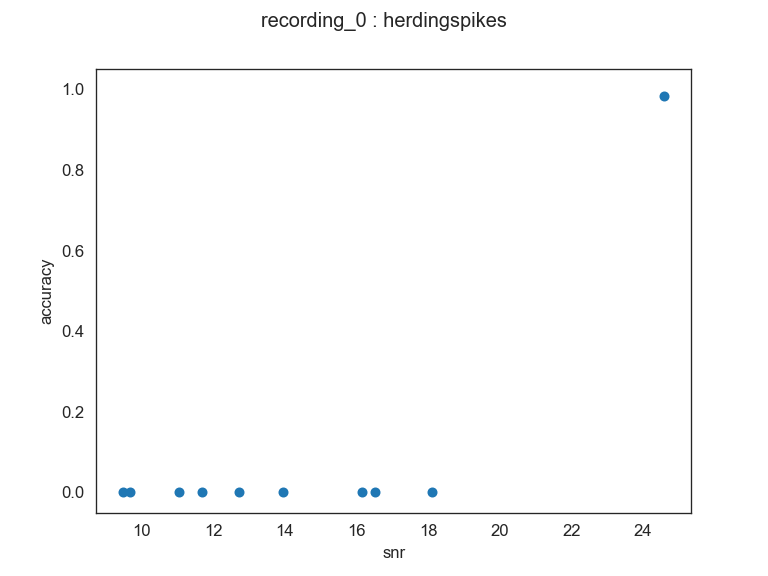

<IPython.core.display.Javascript object>


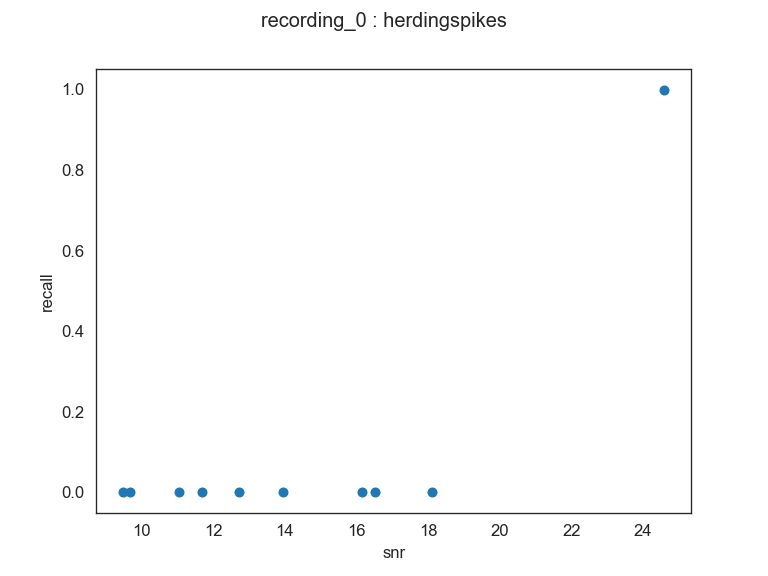

<IPython.core.display.Javascript object>


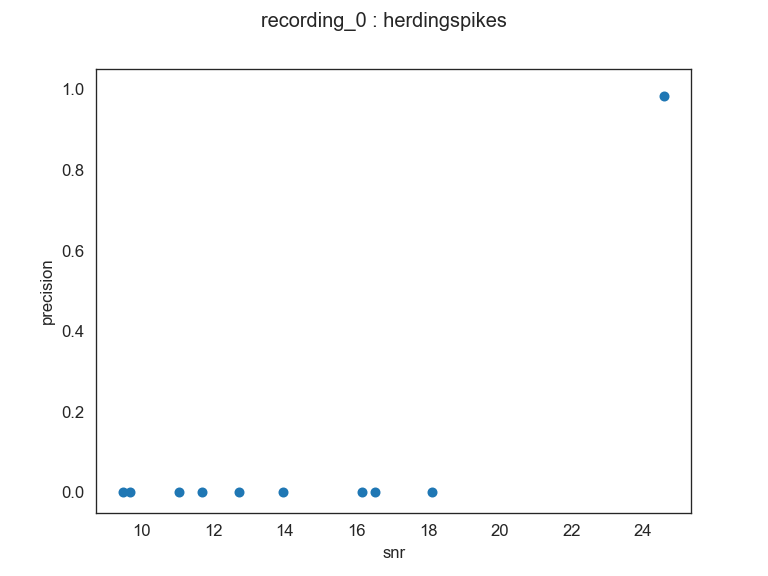

<IPython.core.display.Javascript object>


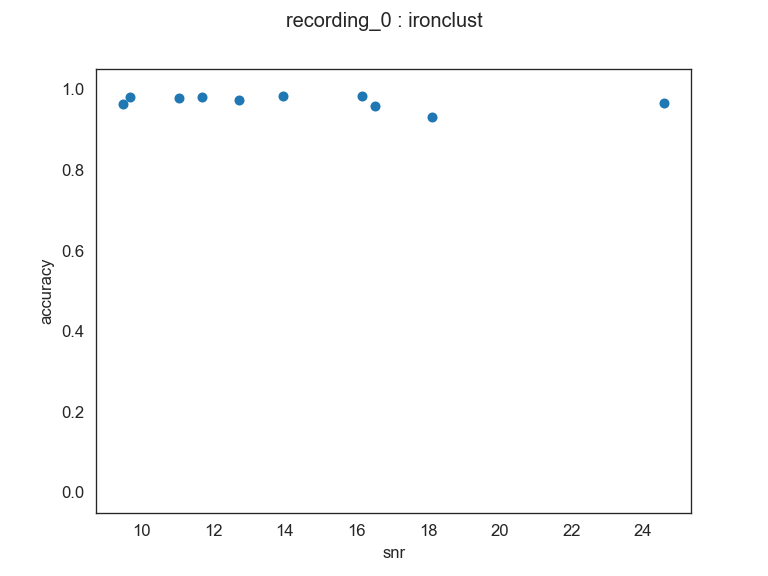

<IPython.core.display.Javascript object>


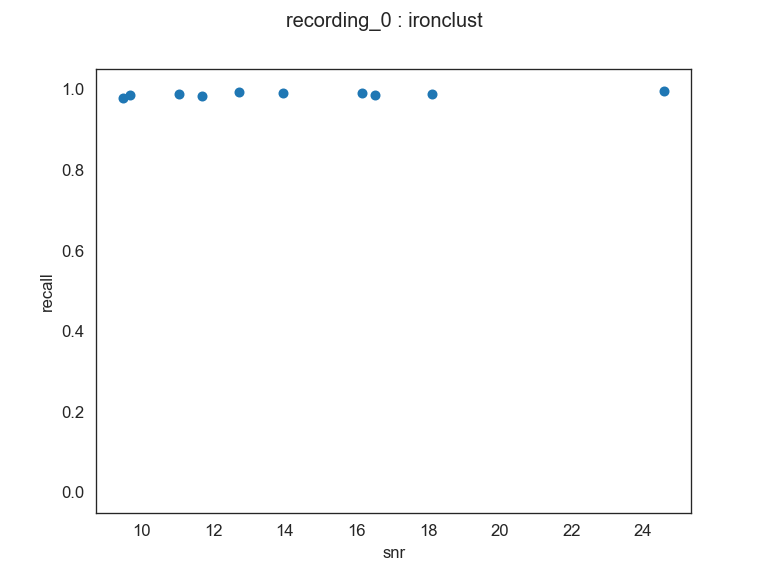

<IPython.core.display.Javascript object>


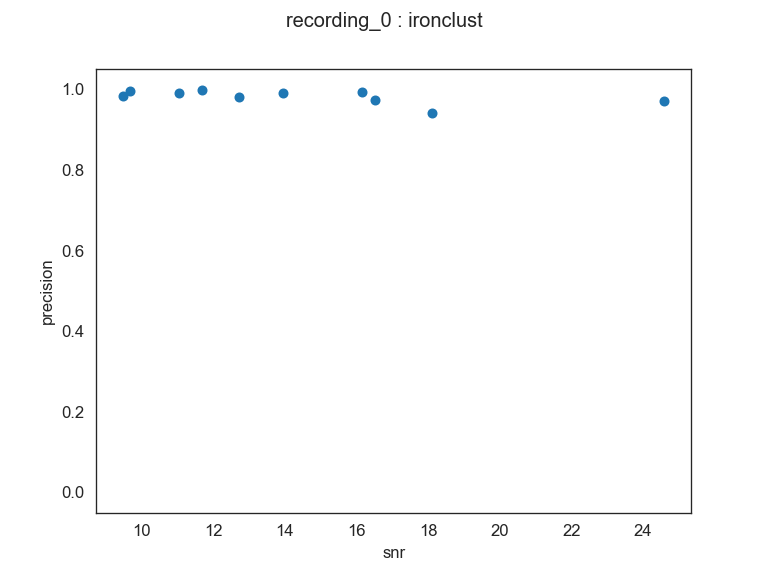

<IPython.core.display.Javascript object>


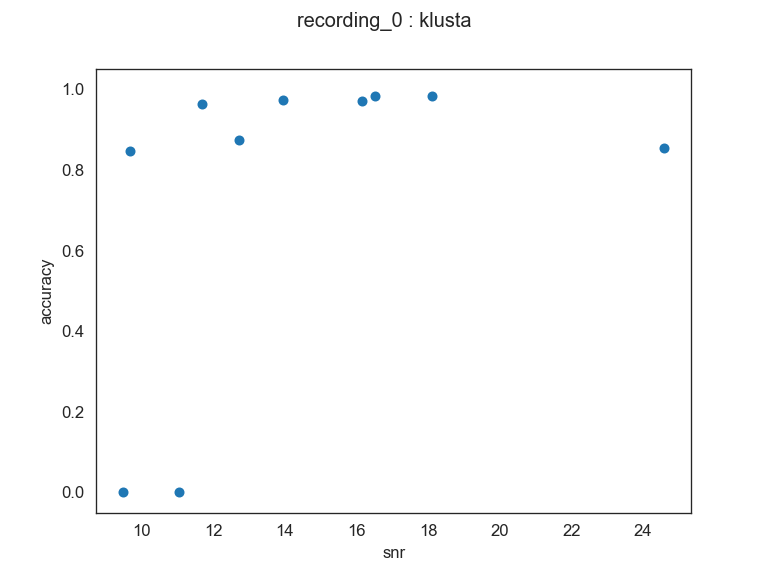

<IPython.core.display.Javascript object>


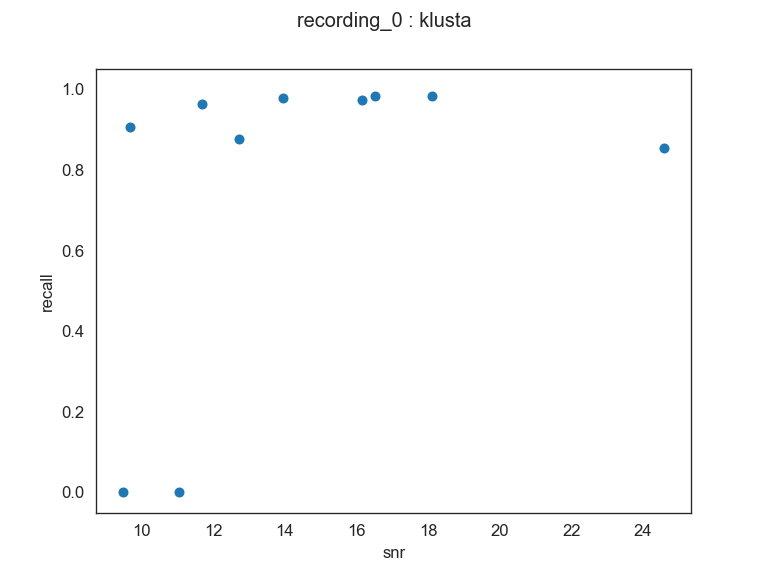

<IPython.core.display.Javascript object>


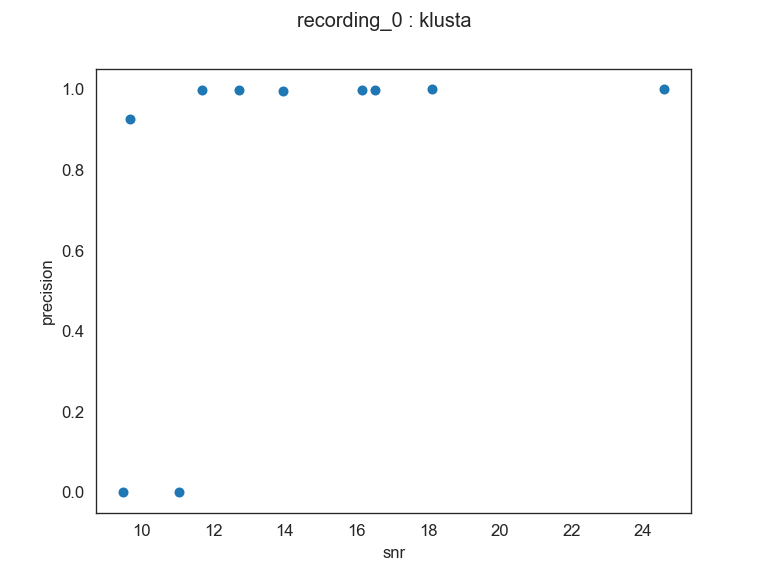

<IPython.core.display.Javascript object>


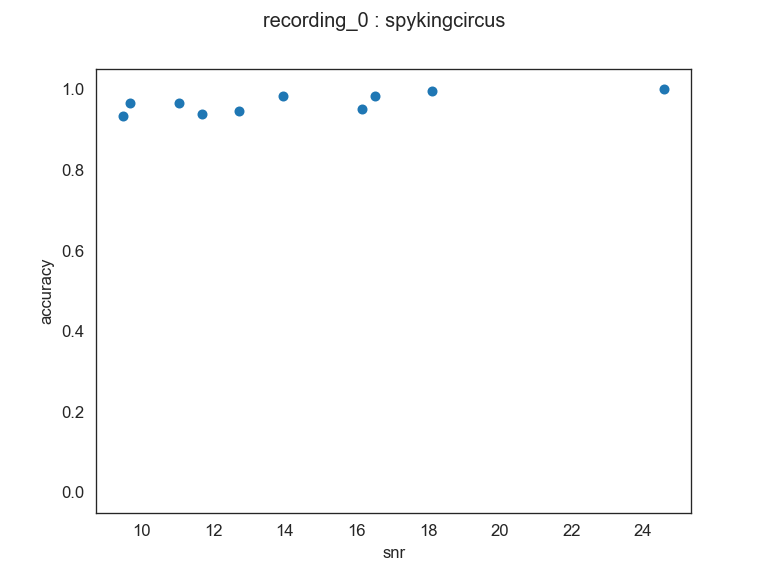

<IPython.core.display.Javascript object>


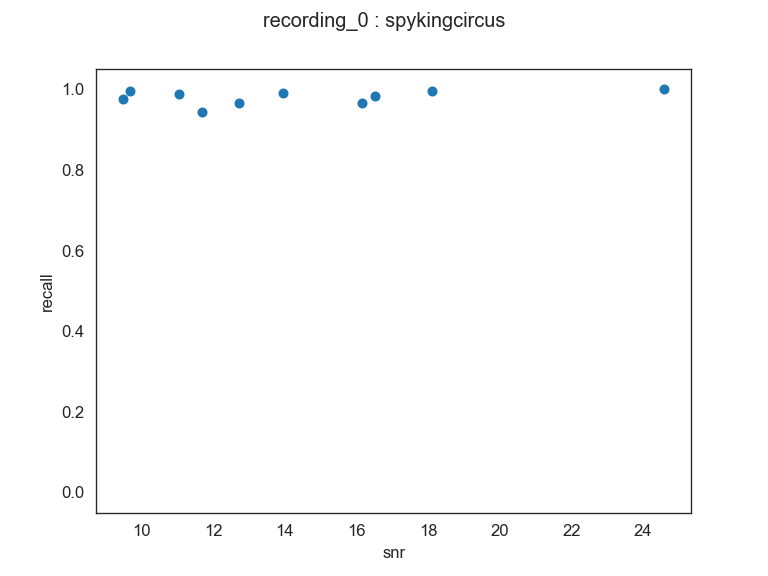

<IPython.core.display.Javascript object>


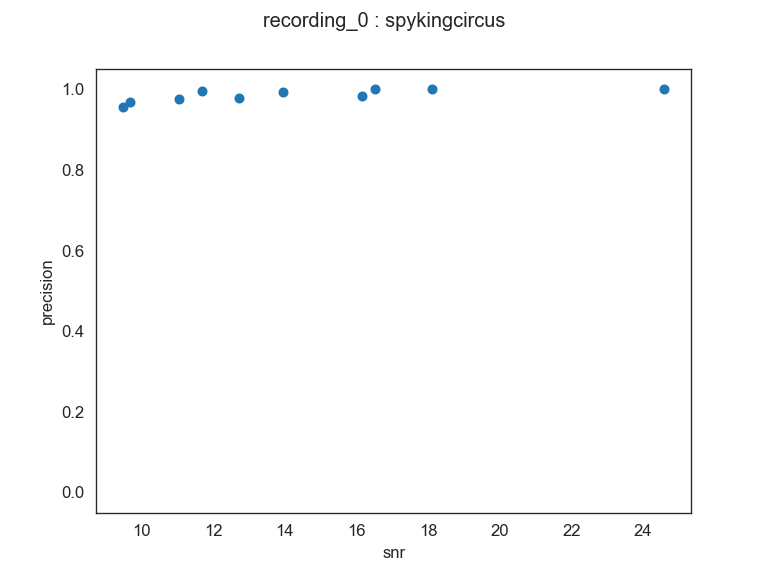

<IPython.core.display.Javascript object>


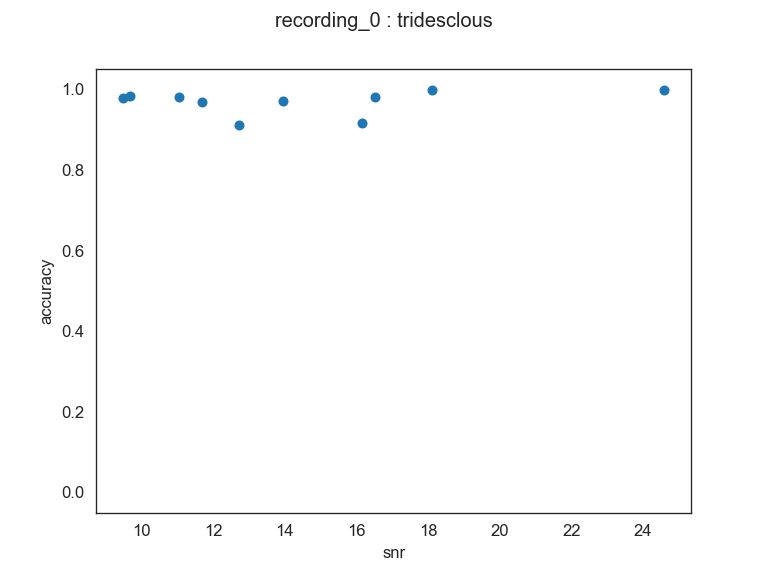

<IPython.core.display.Javascript object>


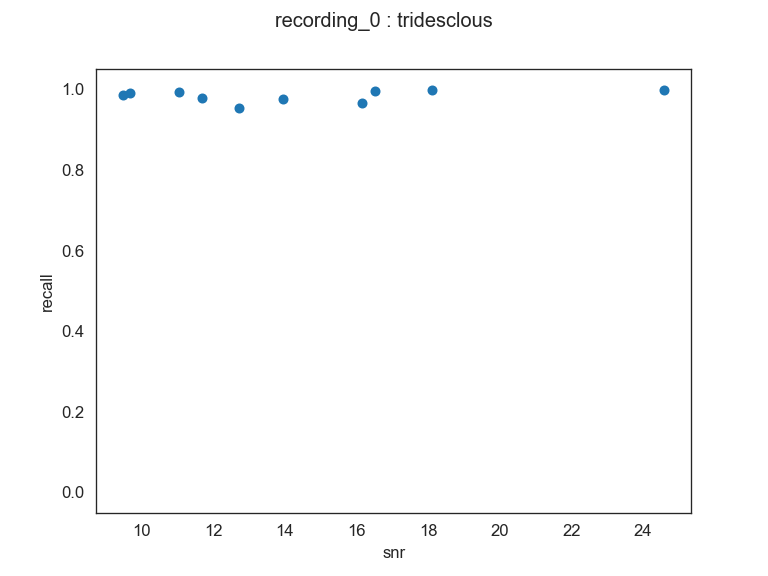

<IPython.core.display.Javascript object>


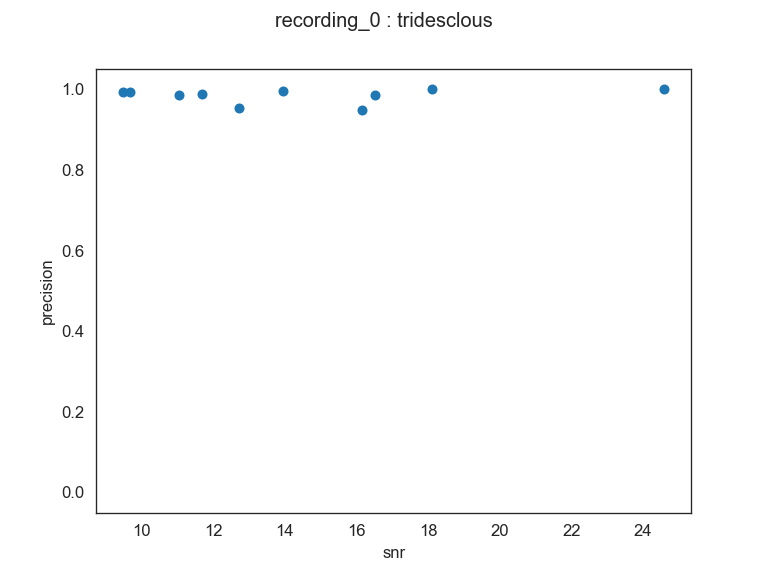

<IPython.core.display.Javascript object>


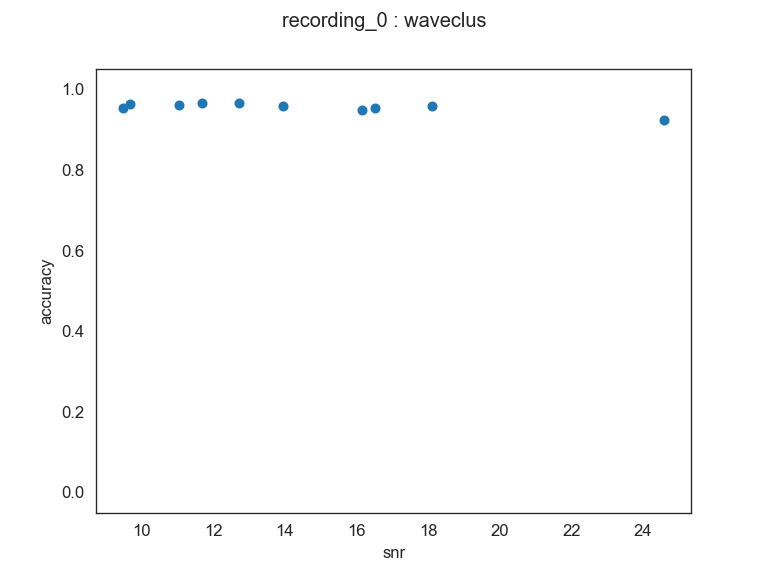

<IPython.core.display.Javascript object>


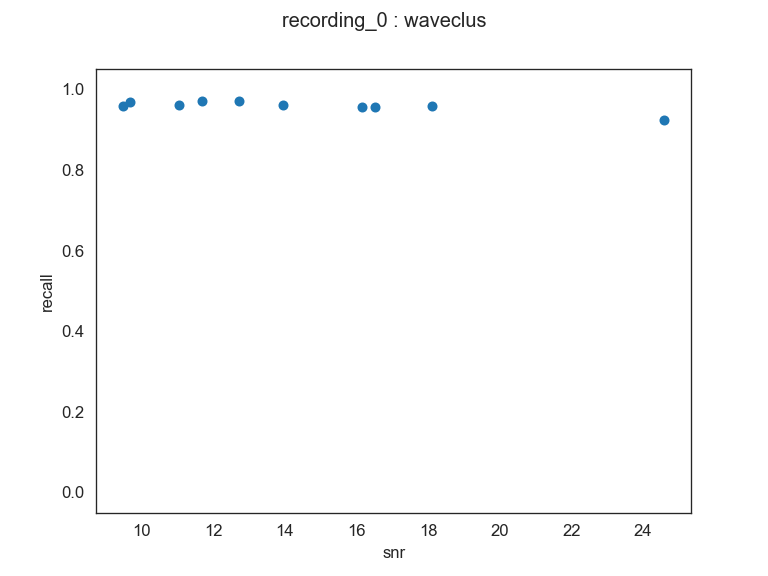

<IPython.core.display.Javascript object>


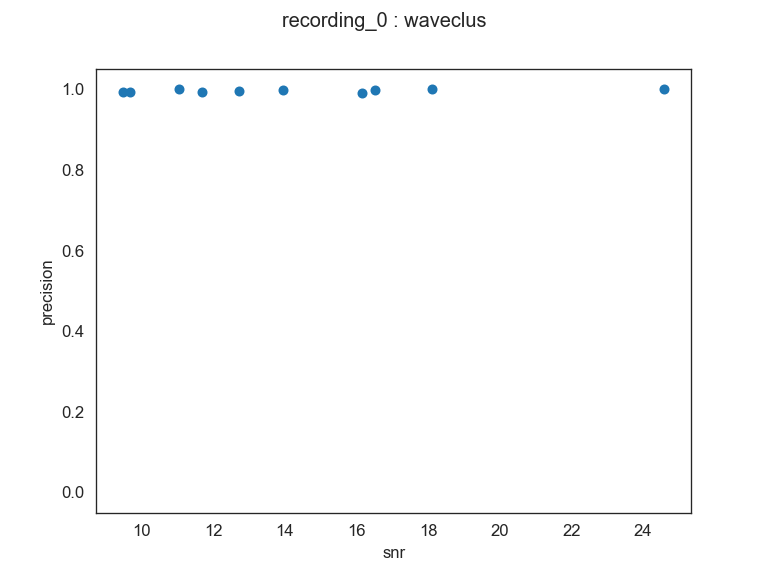

<IPython.core.display.Javascript object>


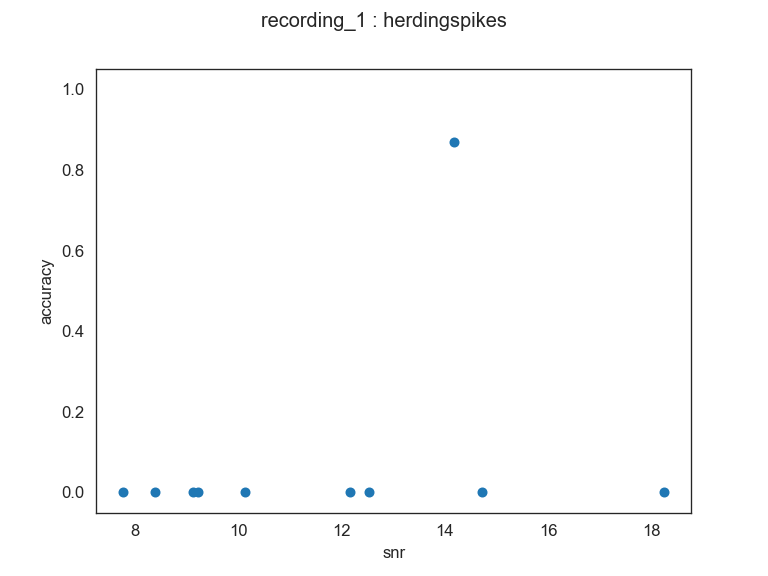

<IPython.core.display.Javascript object>


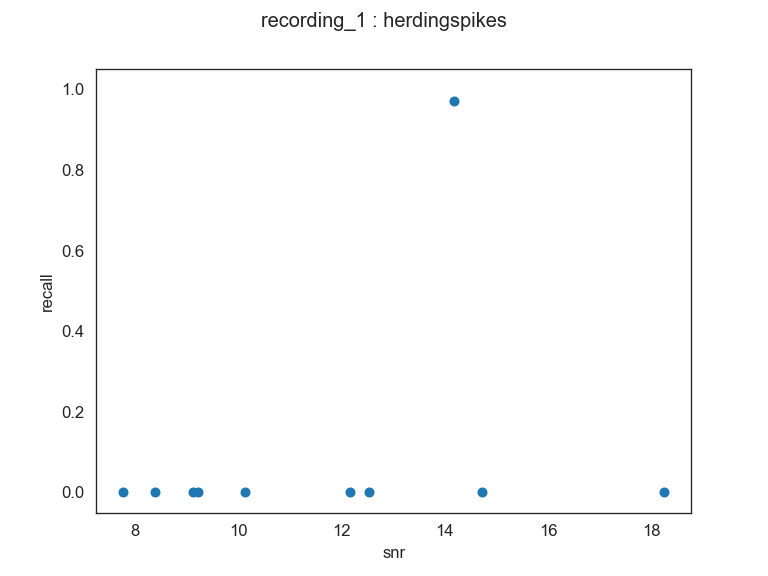

<IPython.core.display.Javascript object>


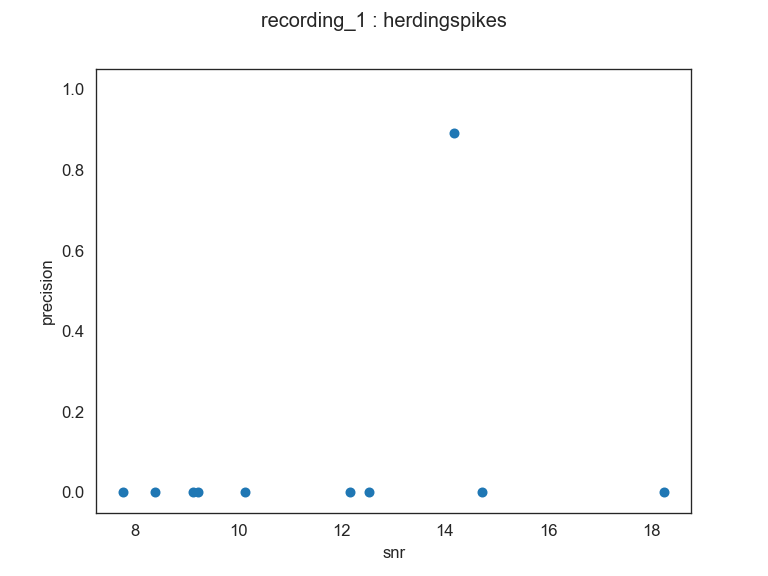

<IPython.core.display.Javascript object>


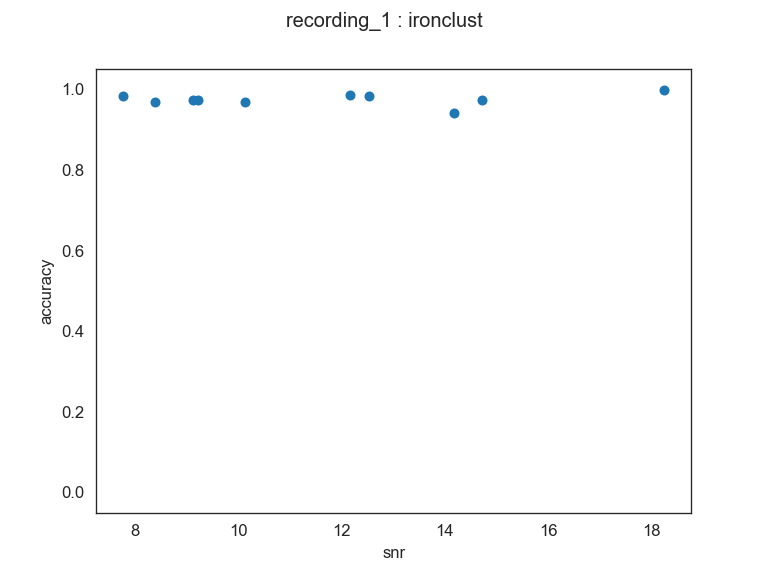

<IPython.core.display.Javascript object>


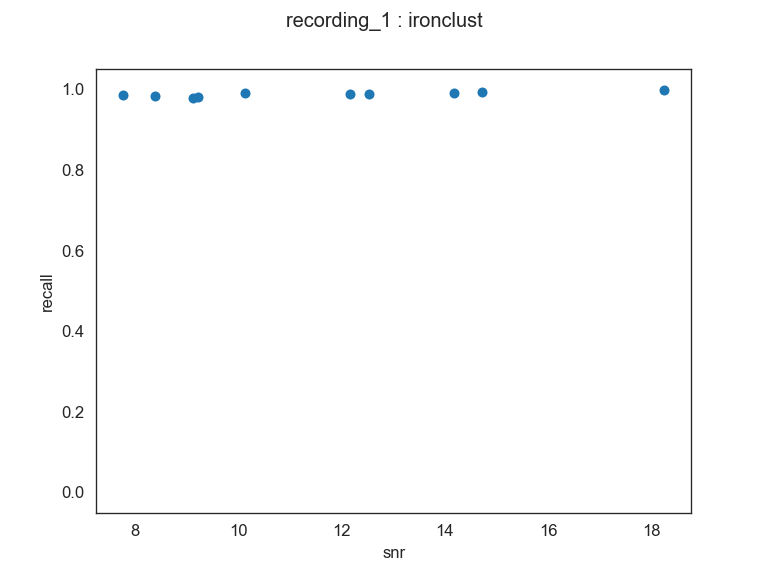

<IPython.core.display.Javascript object>


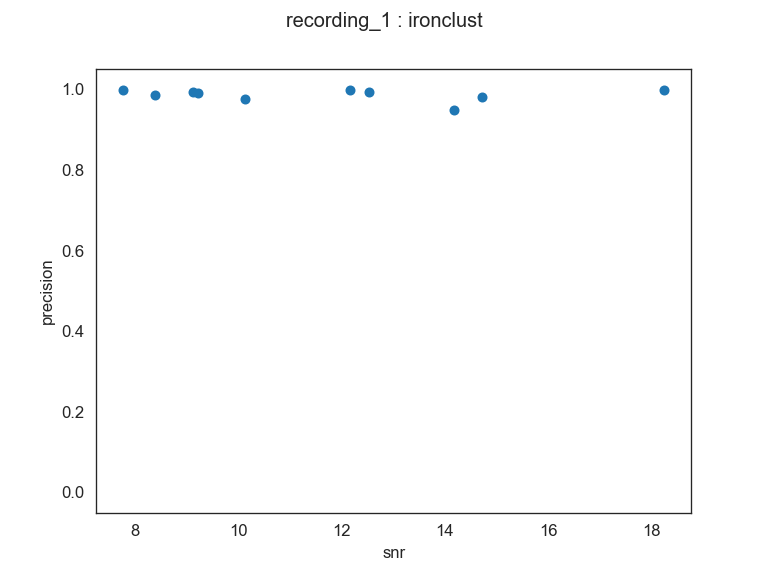

<IPython.core.display.Javascript object>


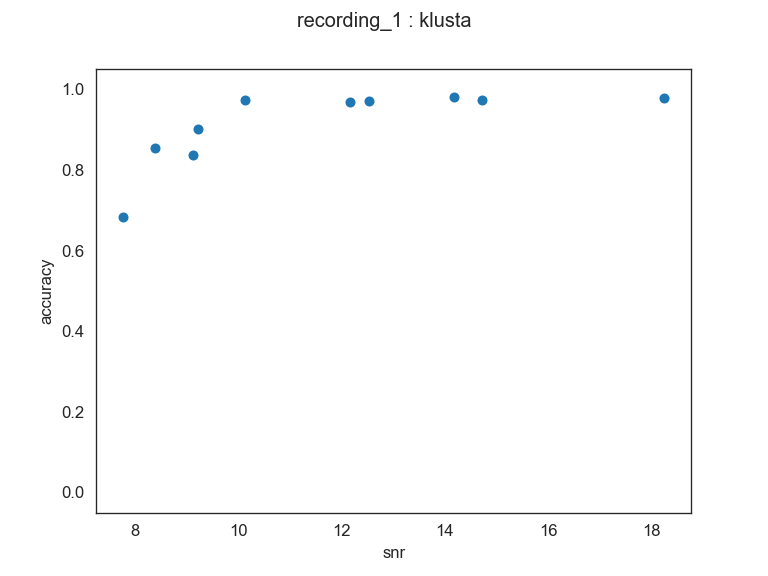

<IPython.core.display.Javascript object>


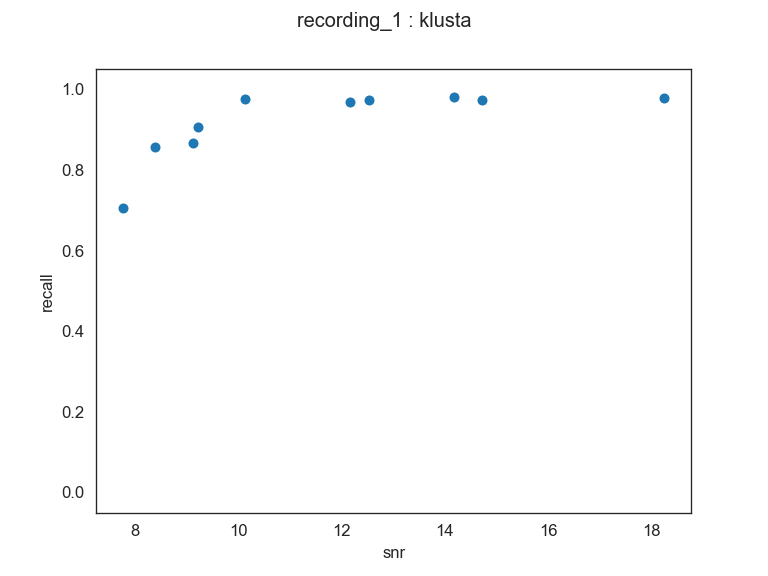

<IPython.core.display.Javascript object>


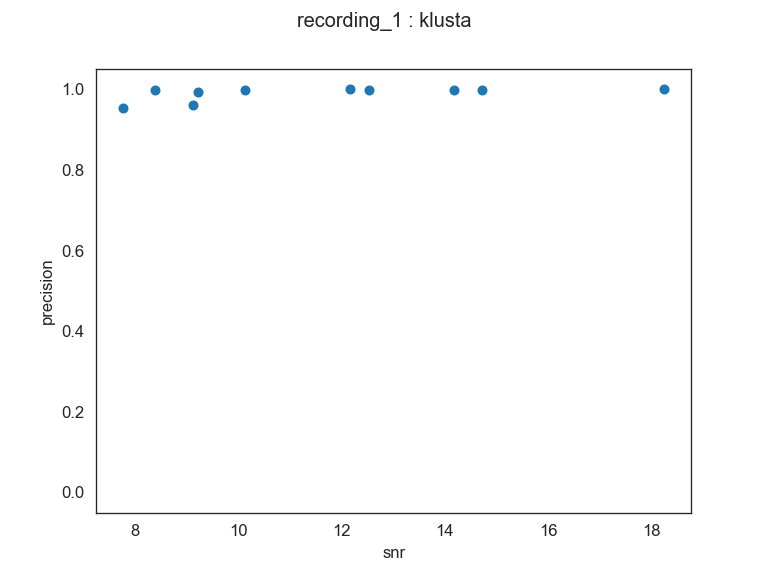

<IPython.core.display.Javascript object>


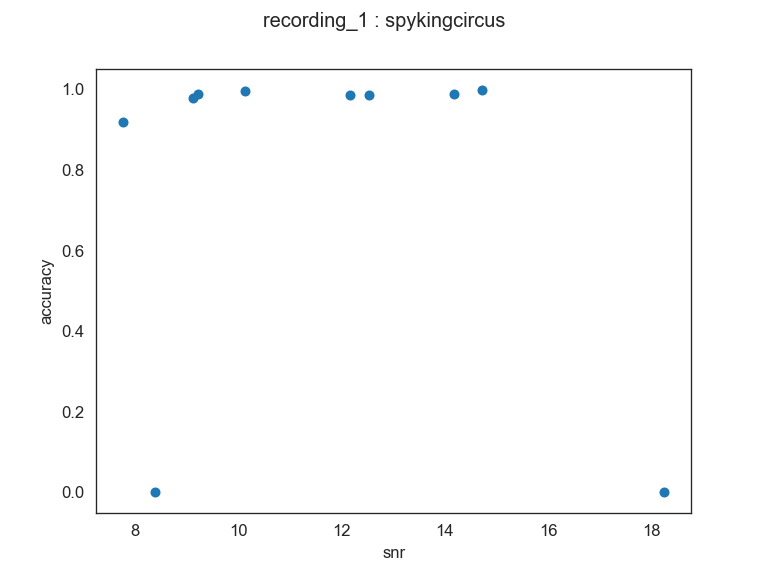

<IPython.core.display.Javascript object>


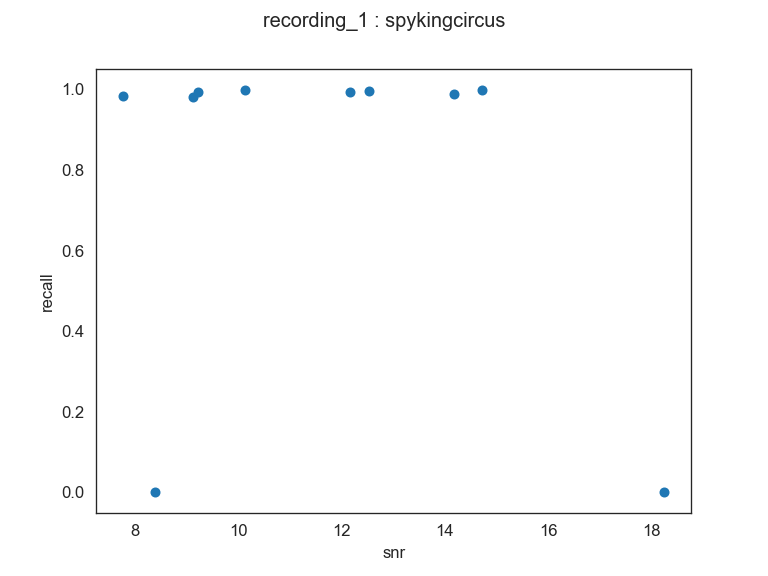

<IPython.core.display.Javascript object>


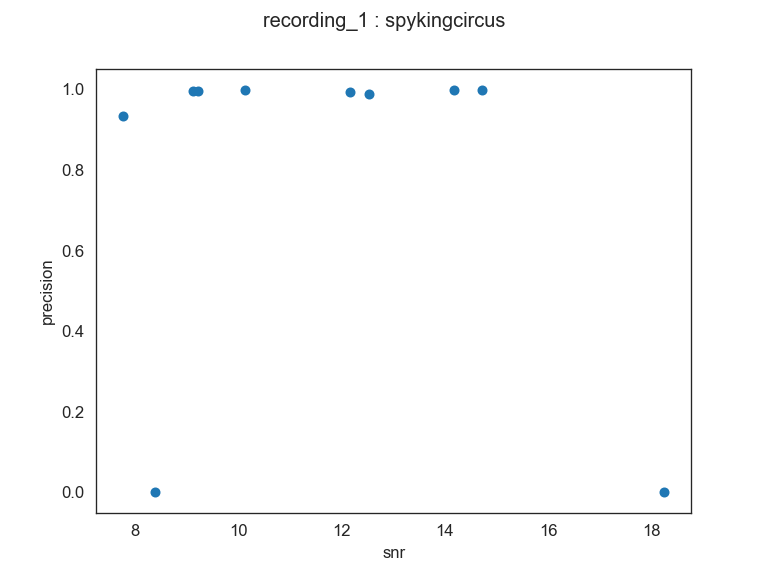

<IPython.core.display.Javascript object>


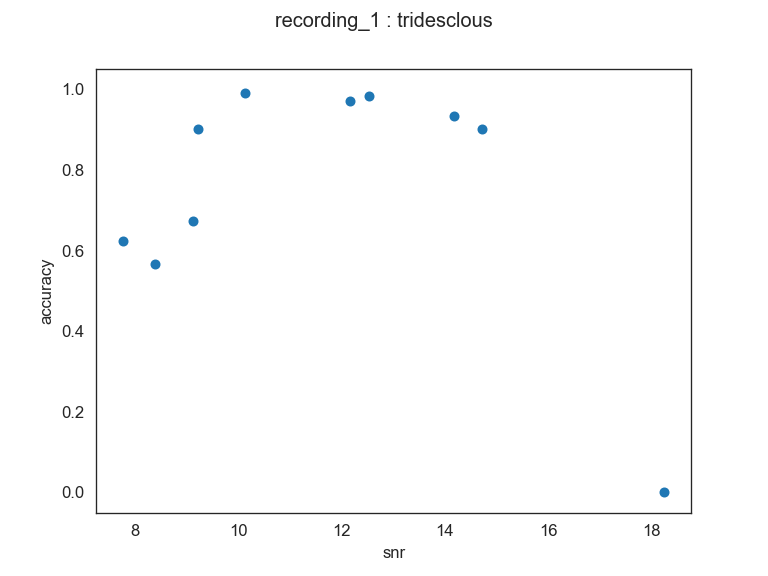

<IPython.core.display.Javascript object>


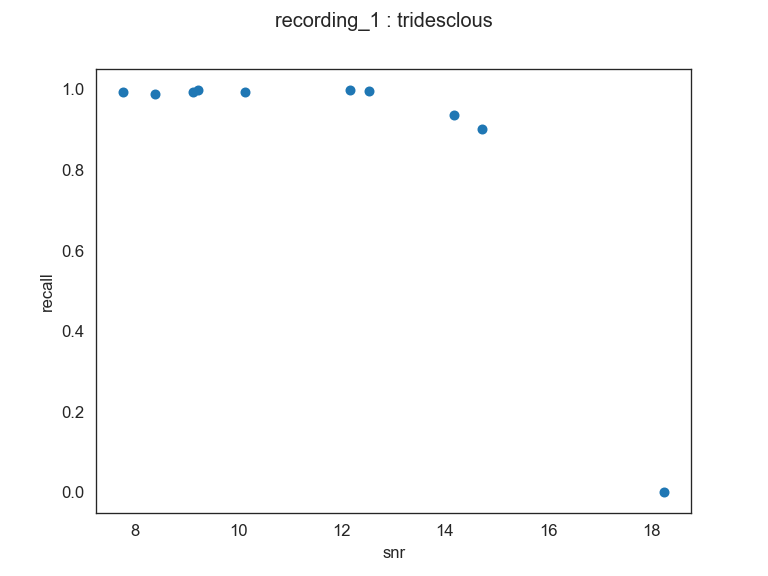

<IPython.core.display.Javascript object>


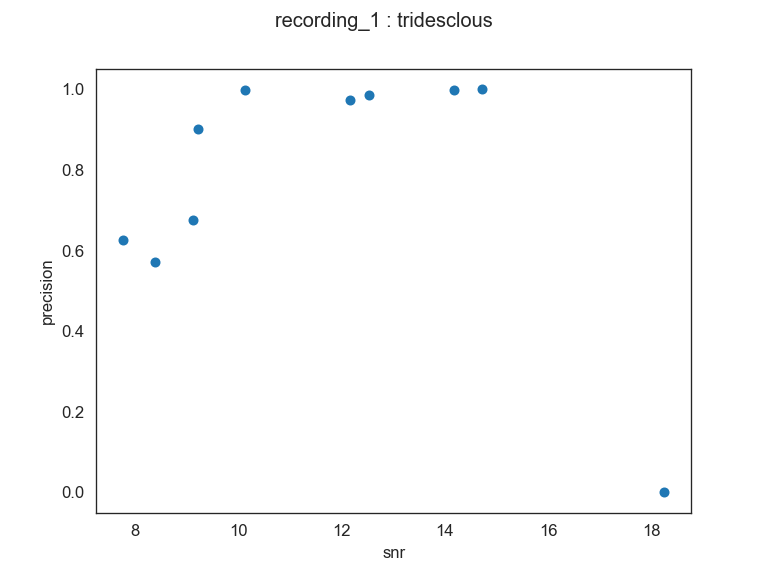

<IPython.core.display.Javascript object>


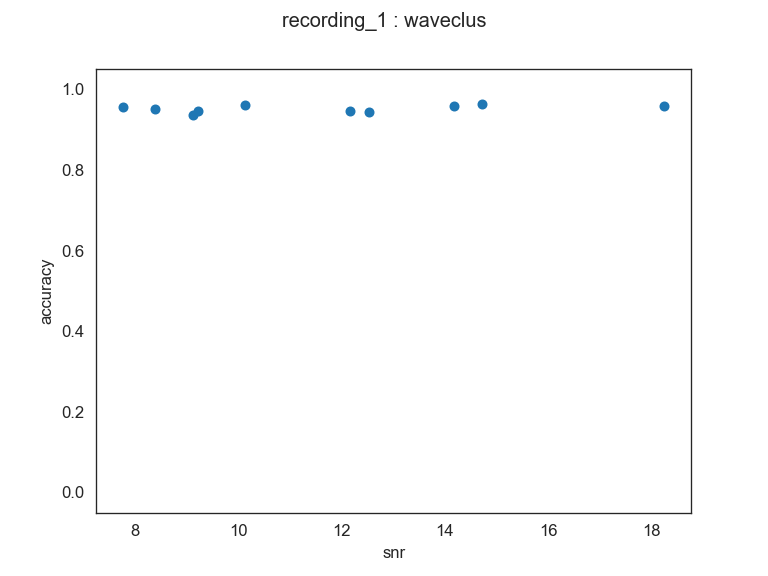

<IPython.core.display.Javascript object>


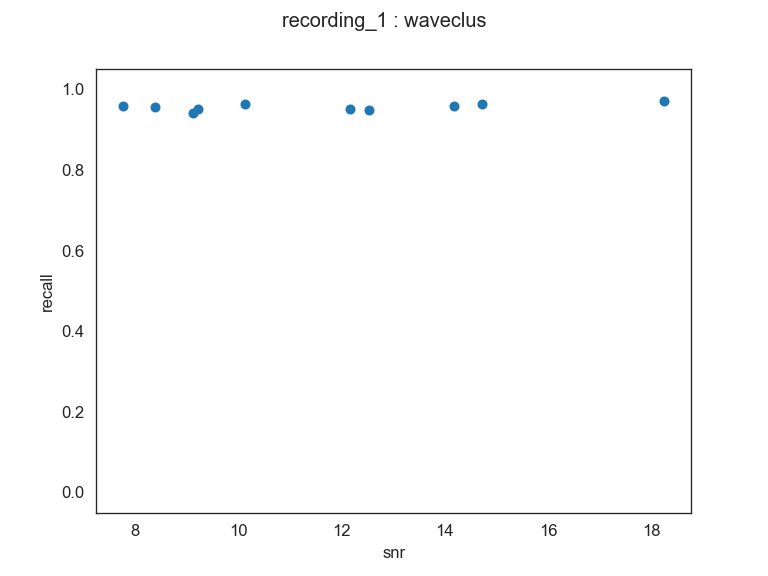

<IPython.core.display.Javascript object>


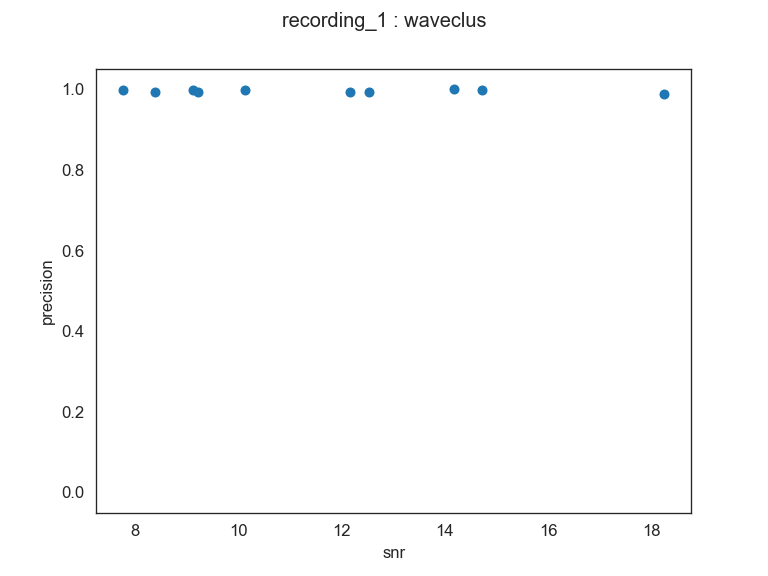

In [59]:
printPerformance(sorter_list)

<IPython.core.display.Javascript object>


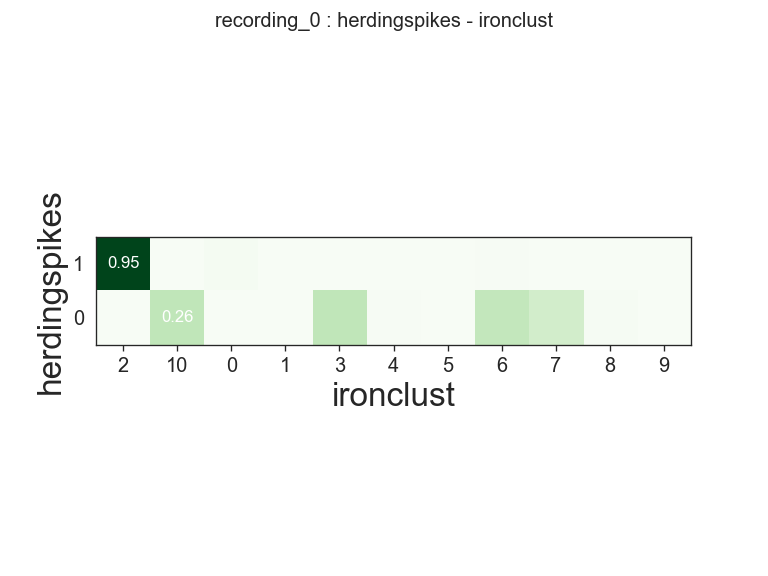

    0   1     2     3   4   5     6     7   8   9     10
0   43   8     3  1372  30   8  1333  1088  62   8  1392
1  174   3  1390     4   2   1    11     7   7   0     0
         0         1         2         3         4         5         6   \
0  0.002756  0.001196  0.000446  0.256833  0.004489  0.001194  0.248787   
1  0.015006  0.001063  0.950103  0.001410  0.000705  0.000353  0.003920   

         7         8         9        10  
0  0.194078  0.009336  0.001193  0.25816  
1  0.002488  0.002481  0.000000  0.00000  


<IPython.core.display.Javascript object>


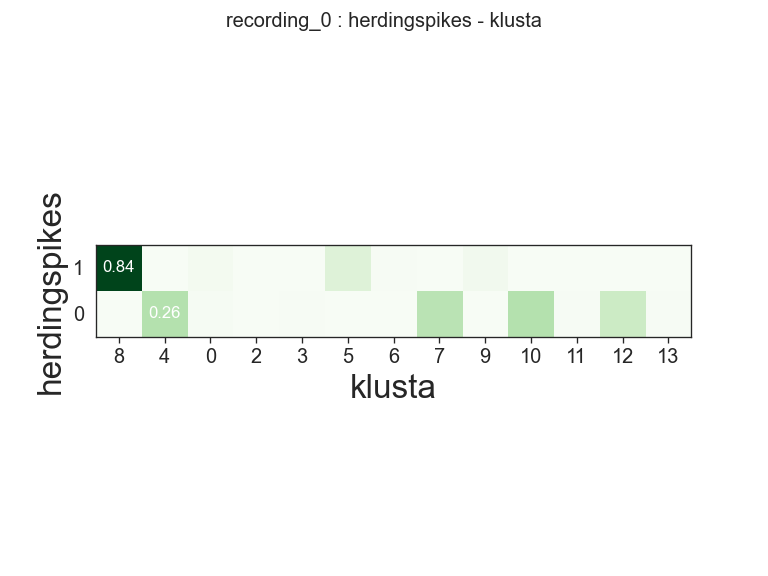

   0   2   3     4    5   6     7     8   9     10  11    12  13
0  43   0  29  1387    1  10  1312     0  10  1376  42  1079  21
1  38   1   0     0  186   5     4  1193  93     0   0     0   8
         0         2        3         4         5         6         7   \
0  0.008060  0.000000  0.00436  0.261402  0.000182  0.001865  0.245325   
1  0.025921  0.000484  0.00000  0.000000  0.130894  0.003349  0.001438   

         8         9         10        11        12        13  
0  0.000000  0.001496  0.259623  0.006486  0.193023  0.003286  
1  0.840141  0.034078  0.000000  0.000000  0.000000  0.003162  


<IPython.core.display.Javascript object>


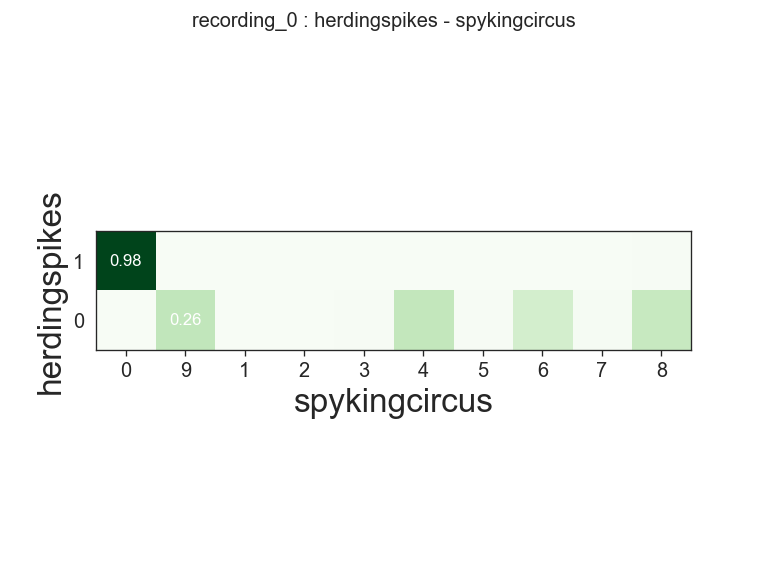

      0  1   2   3     4   5     6   7     8     9
0     3  9  15  38  1371  32  1092  61  1305  1402
1  1397  1   6   1     6   8     5   2    17     4
          0         1         2         3         4         5         6  \
0  0.000448  0.001341  0.002229  0.005742  0.258533  0.004753  0.195035   
1  0.983110  0.000352  0.002095  0.000360  0.002147  0.002775  0.001778   

          7         8         9  
0  0.009231  0.243289  0.264179  
1  0.000716  0.006120  0.001413  


<IPython.core.display.Javascript object>


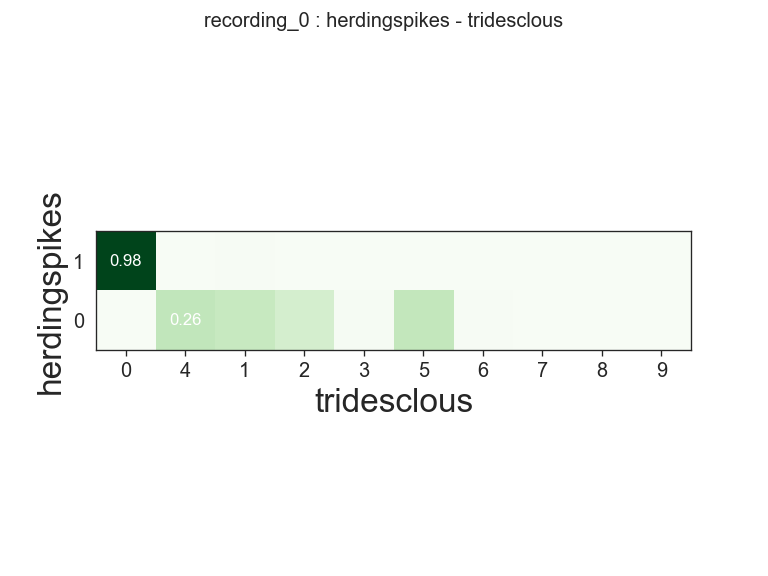

      0     1     2   3     4     5   6  7   8   9
0     3  1312  1072  91  1405  1384  44  3  13  17
1  1396    17     4   9     5     9   7  4   7   2
          0         1         2         3         4         5         6  \
0  0.000449  0.242604  0.191668  0.013798  0.264645  0.259809  0.006594   
1  0.982407  0.006009  0.001435  0.003211  0.001764  0.003182  0.002468   

          7         8         9  
0  0.000448  0.001940  0.002534  
1  0.001415  0.002472  0.000702  


<IPython.core.display.Javascript object>


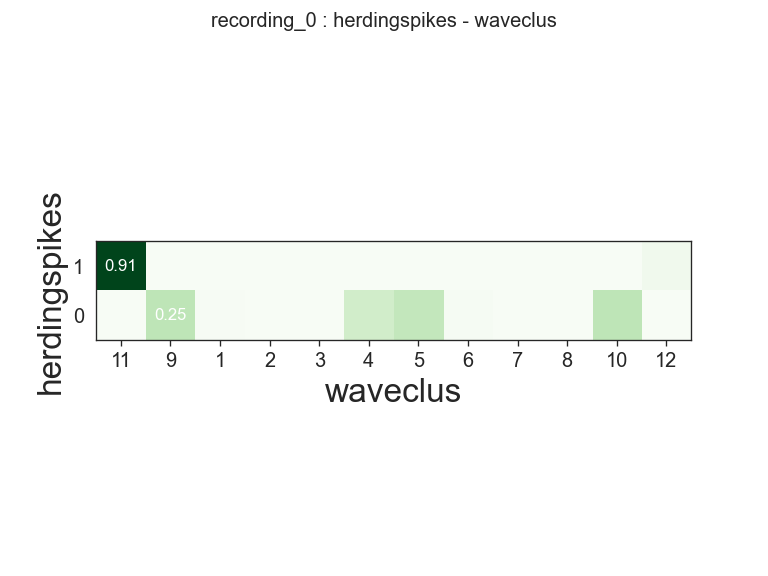

   1   2   3     4     5   6   7   8     9     10    11  12
0  33   6   0  1056  1293  49   4   0  1351  1339     0   1
1   0   0   0     0     8   1   1   0     0     1  1293  57
         1         2    3         4         5         6         7    8   \
0  0.004951  0.000898  0.0  0.189044  0.241637  0.007419  0.000601  0.0   
1  0.000000  0.000000  0.0  0.000000  0.002896  0.000360  0.000359  0.0   

         9         10        11        12  
0  0.254665  0.252737  0.000000  0.000187  
1  0.000000  0.000362  0.910563  0.039888  


<IPython.core.display.Javascript object>


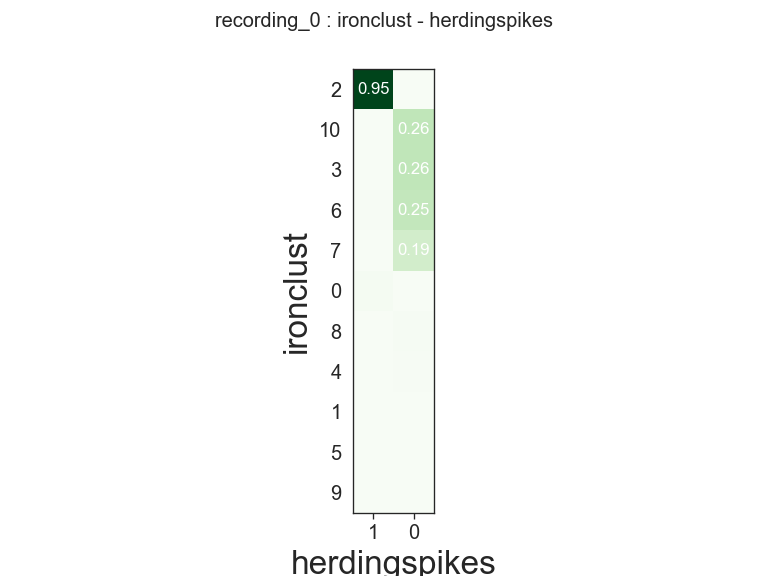

       0     1
0     43   174
1      8     3
2      3  1390
3   1372     4
4     30     2
5      8     1
6   1333    11
7   1088     7
8     62     7
9      8     0
10  1392     0
           0         1
0   0.002756  0.015006
1   0.001196  0.001063
2   0.000446  0.950103
3   0.256833  0.001410
4   0.004489  0.000705
5   0.001194  0.000353
6   0.248787  0.003920
7   0.194078  0.002488
8   0.009336  0.002481
9   0.001193  0.000000
10  0.258160  0.000000


<IPython.core.display.Javascript object>


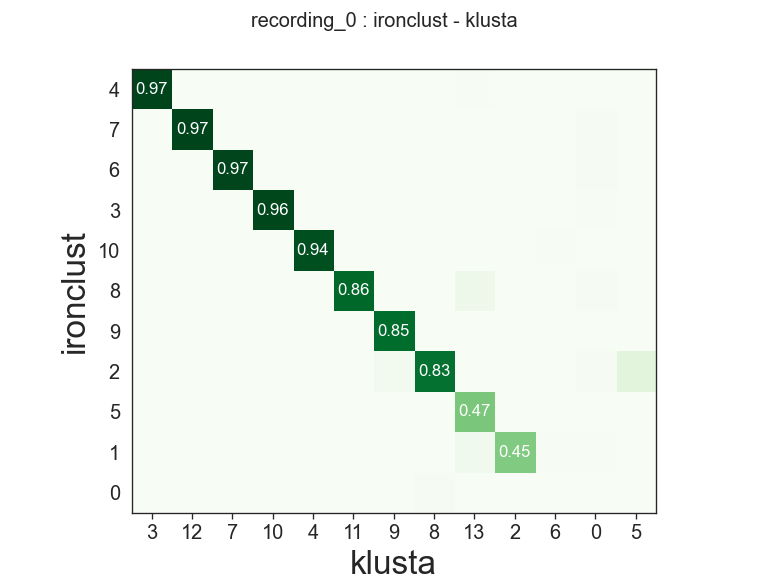

    0    2     3     4    5   6     7     8     9     10    11    12   13
0    2    3     3    23   22  29     0   150     2    21     5     1    0
1    6  638     0     0    0   7     0     0     1     1     0     0  115
2   14    0     0     0  186   5     0  1193    93     0     0     0    7
3    6    0     0     0    0   0     0     0     0  1373     0     0    3
4    3    3  1385     0    0   1     0     0     0     2     0     0   14
5    3    2     2     0    0   2     3     0     1     4     1     2  812
6   16    1     0     0    1   2  1361     0     2     0     3     5    9
7   19    0     0     0    0   1     2     0     7     0     0  1367    2
8   18    2     0     0    0   1     4     0     2     1  1220     1  152
9    1    0     0     0    0   4     0     0  1297     1     0     2    7
10   5    0     0  1399    0   6     0     0     0     1     0     0    0
          0         2         3         4         5         6         7   \
0   0.000192  0.000273  0.000256  0.

<IPython.core.display.Javascript object>


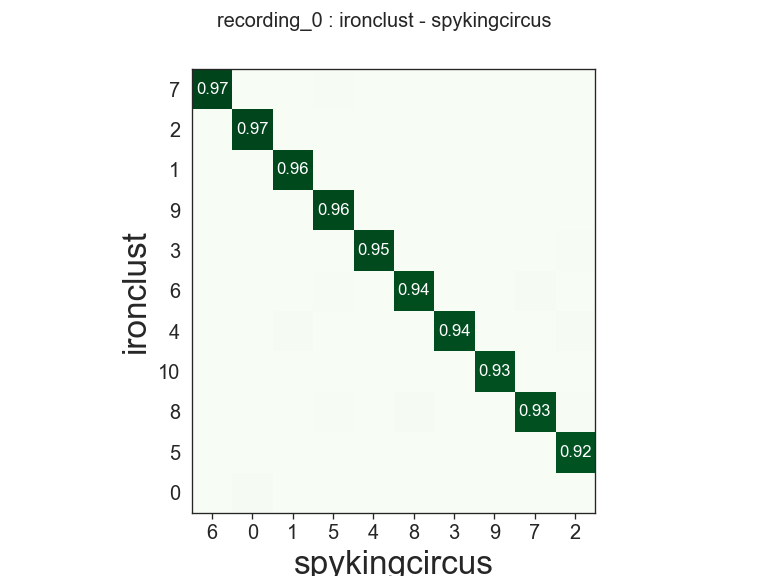

       0     1     2     3     4     5     6     7     8     9
0    174     4     0     3    20     1     0     4     1    24
1      3  1383     2     0     3     6     0     3     1     0
2   1391     0     4     0     2     2     1     0     0     3
3      0     0    14     0  1364     2     1     0     1     0
4      0    29    35  1348     2     3     0     0     0     0
5      0     6  1377     3     4     3     3     5     4     0
6      4     2     3     2     0    14     8    27  1346     1
7      0     1     1     1     2    14  1379     0     6     6
8      0     4    16     8     3    17     5  1343    26     3
9      0     1     1     0     1  1412     3     0     0     0
10     0     1     0     0     1     2     1     0     0  1403
           0         1         2         3         4         5         6  \
0   0.015035  0.000340  0.000000  0.000256  0.001708  0.000085  0.000000   
1   0.001072  0.956432  0.000701  0.000000  0.001079  0.002091  0.000000   
2   0.965972  0.

<IPython.core.display.Javascript object>


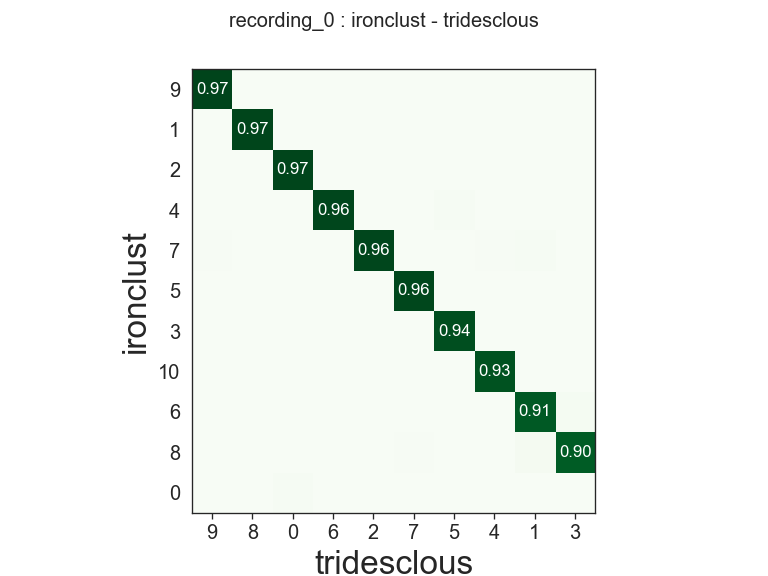

       0     1     2     3     4     5     6     7     8     9
0    174     1     1     5    25    21     6     0     3     1
1      3     0     0     6     0     3     7     6  1388     1
2   1391     0     1     1     3     2     1     1     5     1
3      0     2     0     1     0  1376     6     0     2     1
4      0     0     0     0     0    23  1395     2     3     0
5      0     3     3     4     0     4     3  1384    10     1
6      3  1344     3    43     1     3     4     1     2     5
7      0    25  1360     7    12     2     1     0     0    12
8      0    59     3  1327     3     5     9    16    10     4
9      0     1     3     6     0     2     0     1     1  1406
10     0     0     0     0  1402     1     0     0     1     1
           0         1         2         3         4         5         6  \
0   0.015036  0.000085  0.000085  0.000426  0.002129  0.001788  0.000510   
1   0.001072  0.000000  0.000000  0.002151  0.000000  0.001065  0.002482   
2   0.966644  0.

<IPython.core.display.Javascript object>


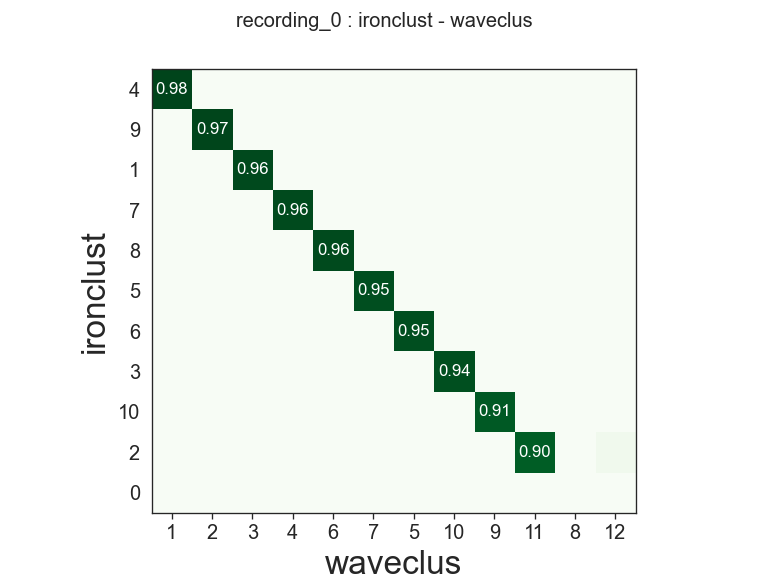

      1     2     3     4     5     6     7   8     9     10    11  12
0      7     1     5     5     1     8     3  14    28    24    10   1
1      2     2  1351     0     0     4     4   0     0     2     0   0
2      0     0     0     0     0     0     0   0     0     0  1293  64
3      3     0     0     0     2     0     6   0     0  1340     0   1
4   1397     0     0     0     0     1     1   0     0     1     0   0
5      2     3     0     1     1     2  1354   0     0     1     0   0
6      0     0     0     0  1336     0     0   0     0     0     0   0
7      0     2     0  1346     4     1     3   0     1     0     0   0
8      1     1     0     1     8  1355     0   0     0     0     0   0
9      0  1388     0     1     0     0     0   0     0     0     0   0
10     0     0     0     0     0     0     0   0  1361     0     0   0
          1         2         3         4         5         6         7   \
0   0.000596  0.000085  0.000428  0.000428  0.000085  0.000684  0.000256

<IPython.core.display.Javascript object>


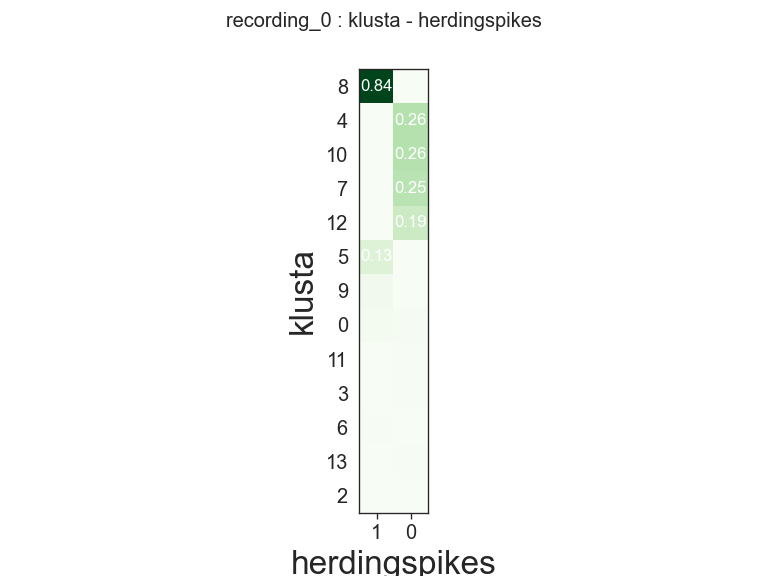

       0     1
0     43    38
2      0     1
3     29     0
4   1387     0
5      1   186
6     10     5
7   1312     4
8      0  1193
9     10    93
10  1376     0
11    42     0
12  1079     0
13    21     8
           0         1
0   0.008060  0.025921
2   0.000000  0.000484
3   0.004360  0.000000
4   0.261402  0.000000
5   0.000182  0.130894
6   0.001865  0.003349
7   0.245325  0.001438
8   0.000000  0.840141
9   0.001496  0.034078
10  0.259623  0.000000
11  0.006486  0.000000
12  0.193023  0.000000
13  0.003286  0.003162


<IPython.core.display.Javascript object>


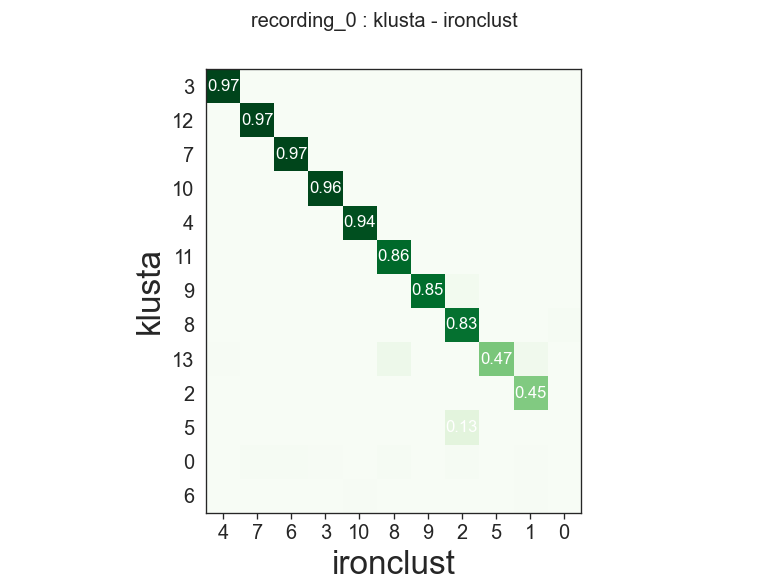

     0    1     2     3     4    5     6     7     8     9     10
0     2    6    14     6     3    3    16    18    18     1     5
2     3  638     0     0     3    2     1     0     2     0     0
3     3    0     0     0  1385    2     0     0     0     0     0
4    23    0     0     0     0    0     0     0     0     0  1399
5    22    0   186     0     0    0     1     0     0     0     0
6    29    7     5     0     1    2     2     1     1     4     6
7     0    0     0     0     0    3  1361     2     4     0     0
8   150    0  1193     0     0    0     0     0     0     0     0
9     2    1    93     0     0    1     2     7     2  1297     0
10   21    1     0  1373     2    4     0     0     1     1     1
11    5    0     0     0     0    1     3     0  1220     0     0
12    1    0     0     0     0    2     5  1367     1     2     0
13    0  115     7     3    14  812     9     2   152     7     0
          0         1         2         3         4         5         6   \


<IPython.core.display.Javascript object>


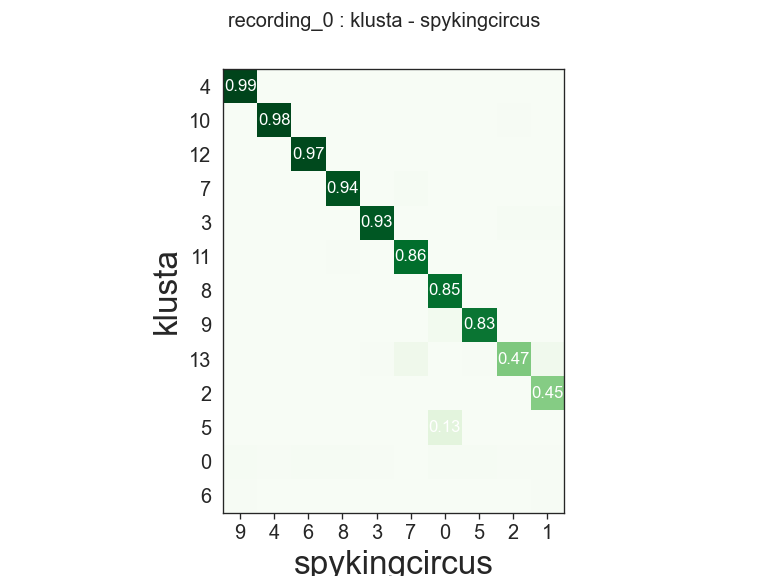

       0    1    2     3     4     5     6     7     8     9
0     21    6    9     9    11    17    17     5    20    16
2      0  640    1     2     0     0     0     2     1     0
3      0   27   32  1324     0     1     0     0     0     0
4      0    0    0     0     0     0     1     0     0  1399
5    187    0    0     0     0     0     1     1     0     0
6      5    7    2     0     0     4     1     1     1     6
7      0    2    1     0     0     8     4    24  1331     0
8   1193    0    0     0     0     0     0     0     0     0
9     93    2    0     0     1  1302     6     0     0     1
10     0    0   12     2  1365     2     0     0     0     1
11     0    0    6     0     0     2     0  1202    14     0
12     0    1    0     0     0     5  1365     0     5     1
13     7  113  816    16     5    19     4   136     9     0
           0         1         2         3         4         5         6  \
0   0.014374  0.003992  0.005902  0.006263  0.007571  0.011053  0.0116

<IPython.core.display.Javascript object>


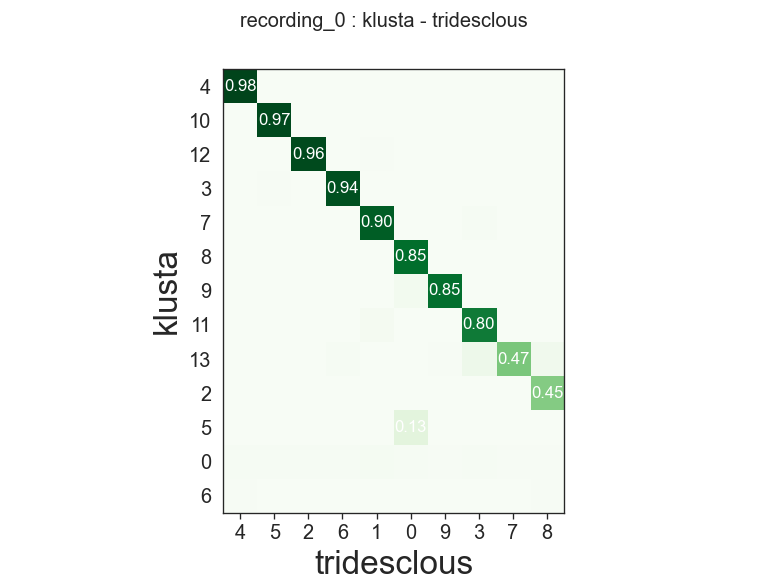

       0     1     2     3     4     5     6    7    8     9
0     19    25    13    16    20    17    14    7   11     9
2      0     1     0     2     0     0     4    0  639     0
3      0     0     0     0     0    20  1364    1    2     0
4      0     0     0     0  1398     0     0    0    0     0
5    187     1     1     0     0     0     0    0    0     0
6      5     1     1     2     6     0     1    2    8     3
7      0  1325     2    39     0     0     1    1    3     1
8   1193     0     0     0     0     0     0    0    2     0
9     93     1     6     2     1     1     0    0    2  1299
10     0     0     0     0     0  1375     8    0    2     1
11     0    51     0  1166     0     0     0    6    0     0
12     0    20  1348     5     2     0     0    0    0     2
13     7     7     1   152     1     6    20  814  116    11
           0         1         2         3         4         5         6  \
0   0.012996  0.016835  0.009015  0.010959  0.013477  0.011456  0.0093

<IPython.core.display.Javascript object>


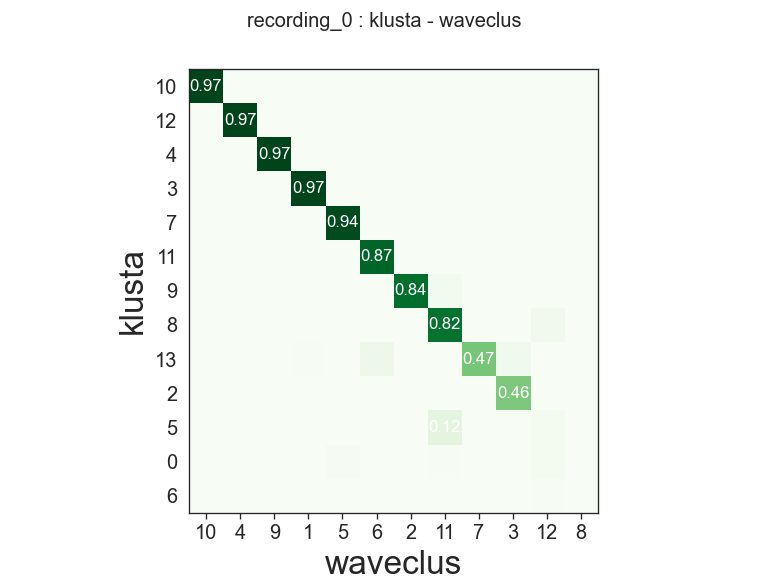

      1     2    3     4     5     6    7   8     9     10    11  12
0      3     0    1     3    19     4    3   0     4     1     9   4
2      3     0  629     0     0     2    1   0     0     0     0   0
3   1371     0    0     0     0     0    1   0     0     1     0   0
4      0     0    0     0     0     0    0   0  1357     0     0   0
5      0     0    0     0     0     0    0   0     0     0   163   7
6      0     1    5     1     1     1    3   0     5     0     1   1
7      0     0    0     0  1319     3    0   0     0     0     0   0
8      0     0    0     0     0     0    0   0     0     0  1122  49
9      0  1277    1     5     1     0    0   0     0     0    90   3
10     4     0    0     1     0     0    3   0     1  1340     0   0
11     0     1    0     0     2  1200    0   0     0     0     0   0
12     0     3    0  1339     5     1    0   0     0     0     0   0
13    12     8  105     1     6   143  799   0     0     2     4   2
          1         2         3   

<IPython.core.display.Javascript object>


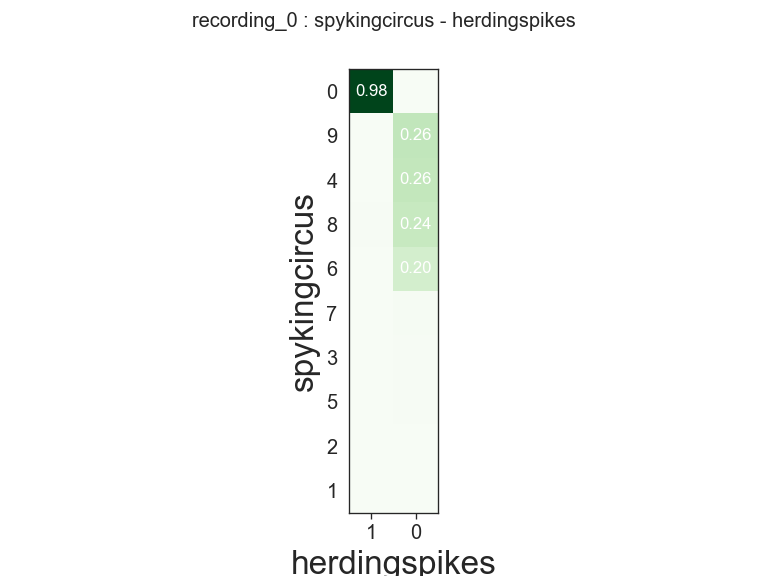

      0     1
0     3  1397
1     9     1
2    15     6
3    38     1
4  1371     6
5    32     8
6  1092     5
7    61     2
8  1305    17
9  1402     4
          0         1
0  0.000448  0.983110
1  0.001341  0.000352
2  0.002229  0.002095
3  0.005742  0.000360
4  0.258533  0.002147
5  0.004753  0.002775
6  0.195035  0.001778
7  0.009231  0.000716
8  0.243289  0.006120
9  0.264179  0.001413


<IPython.core.display.Javascript object>


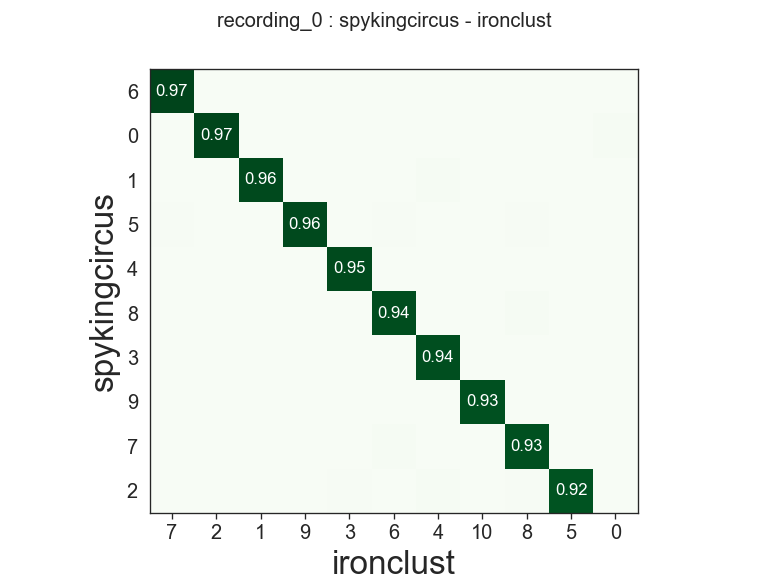

    0     1     2     3     4     5     6     7     8     9     10
0  174     3  1391     0     0     0     4     0     0     0     0
1    4  1383     0     0    29     6     2     1     4     1     1
2    0     2     4    14    35  1377     3     1    16     1     0
3    3     0     0     0  1348     3     2     1     8     0     0
4   20     3     2  1364     2     4     0     2     3     1     1
5    1     6     2     2     3     3    14    14    17  1412     2
6    0     0     1     1     0     3     8  1379     5     3     1
7    4     3     0     0     0     5    27     0  1343     0     0
8    1     1     0     1     0     4  1346     6    26     0     0
9   24     0     3     0     0     0     1     6     3     0  1403
         0         1         2         3         4         5         6   \
0  0.015035  0.001072  0.965972  0.000000  0.000000  0.000000  0.001433   
1  0.000340  0.956432  0.000000  0.000000  0.010302  0.002116  0.000709   
2  0.000000  0.000701  0.001389  0.004

<IPython.core.display.Javascript object>


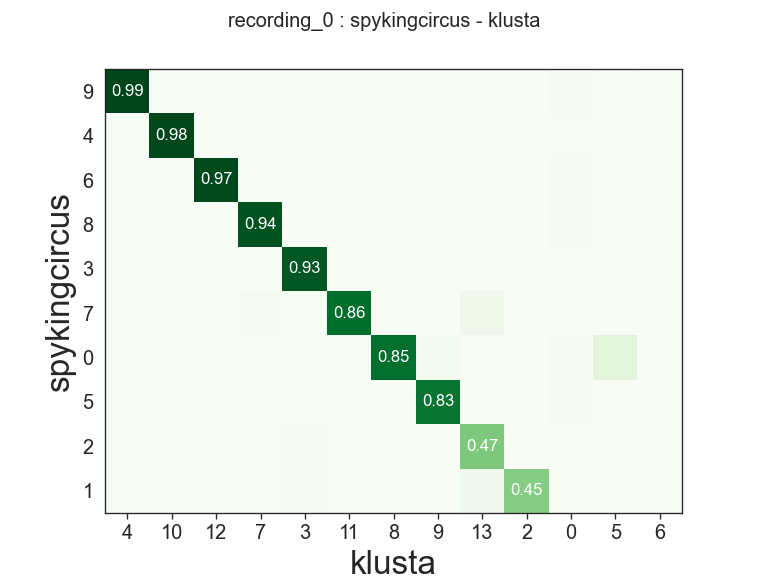

   0    2     3     4    5   6     7     8     9     10    11    12   13
0  21    0     0     0  187   5     0  1193    93     0     0     0    7
1   6  640    27     0    0   7     2     0     2     0     0     1  113
2   9    1    32     0    0   2     1     0     0    12     6     0  816
3   9    2  1324     0    0   0     0     0     0     2     0     0   16
4  11    0     0     0    0   0     0     0     1  1365     0     0    5
5  17    0     1     0    0   4     8     0  1302     2     2     5   19
6  17    0     0     1    1   1     4     0     6     0     0  1365    4
7   5    2     0     0    1   1    24     0     0     0  1202     0  136
8  20    1     0     0    0   1  1331     0     0     0    14     5    9
9  16    0     0  1399    0   6     0     0     1     1     0     1    0
         0         2         3         4         5         6         7   \
0  0.014374  0.000000  0.000000  0.000000  0.133763  0.003399  0.000000   
1  0.003992  0.447552  0.009695  0.000000  0.00

<IPython.core.display.Javascript object>


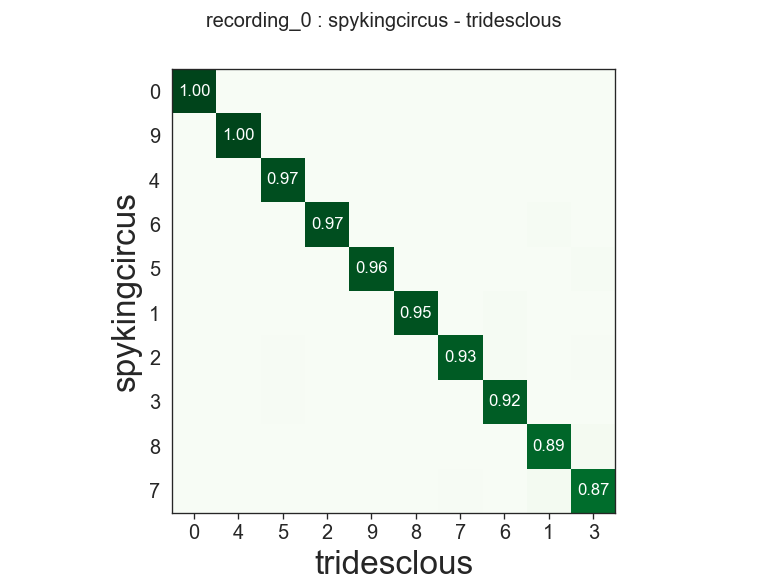

      0     1     2     3     4     5     6     7     8     9
0  1397     2     2     4     3     2     1     1     5     0
1     0     4     1     4     1     0    36     2  1388     1
2     4     3     2    17     0    18    35  1376     8     0
3     0     1     1     6     2    19  1335     4     6     0
4     1     0     0     2     3  1375     8     2     2     2
5     2    10     8    26     4     9     5     5     8  1418
6     2    26  1360     8     7     2     2     1     1     8
7     3    71     0  1290     0     0     0    13     2     1
8     2  1321     4    53     2     1     6     3     5     4
9     3     2     4     0  1414     4     1     0     2     1
          0         1         2         3         4         5         6  \
0  0.999285  0.000709  0.000723  0.001436  0.001066  0.000711  0.000355   
1  0.000000  0.001405  0.000358  0.001422  0.000352  0.000000  0.012802   
2  0.001407  0.001044  0.000709  0.006018  0.000000  0.006318  0.012333   
3  0.000000  0.000

<IPython.core.display.Javascript object>


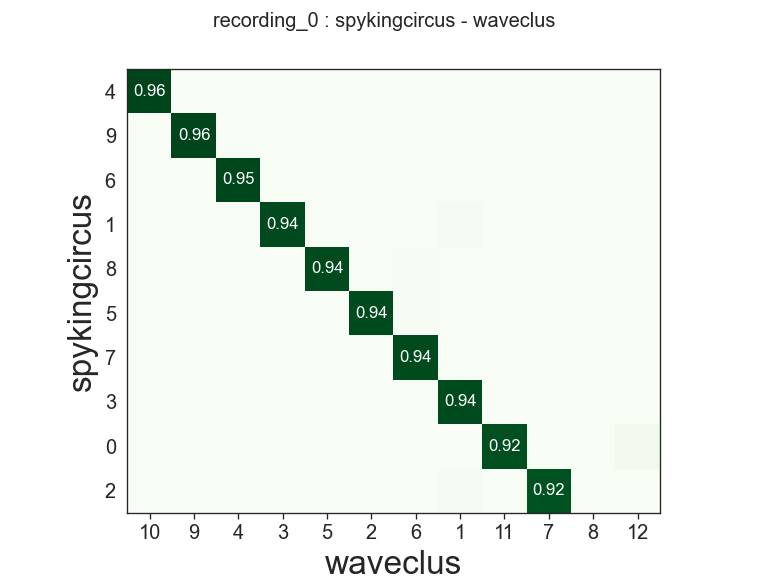

     1     2     3     4     5     6     7   8     9     10    11  12
0     0     0     0     0     0     0     0   0     0     0  1293  56
1    27     0  1347     0     3     5     3   0     1     0     0   0
2    32     4     0     0     2     8  1348   0     0     6     2   1
3  1339     0     0     0     4     4     3   0     0     0     0   0
4     1     0     0     1     0     1     7   0     1  1335     0   1
5     3  1388     1     7     9    11     2   0     2     2     1   0
6     0     2     0  1340     9     1     1   0     0     0     0   0
7     1     0     0     0    10  1324     3   0     0     0     0   0
8     0     0     0     1  1321    15     0   0     0     0     0   0
9     0     0     0     0     0     0     2   0  1358     0     1   0
         1         2         3         4         5         6         7    8   \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1  0.009636  0.000000  0.942617  0.000000  0.001082  0.001799  0.00107

c:\spike_sorting_software\venv\lib\site-packages\spikewidgets\widgets\basewidget.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  self.figure = plt.figure()


<IPython.core.display.Javascript object>


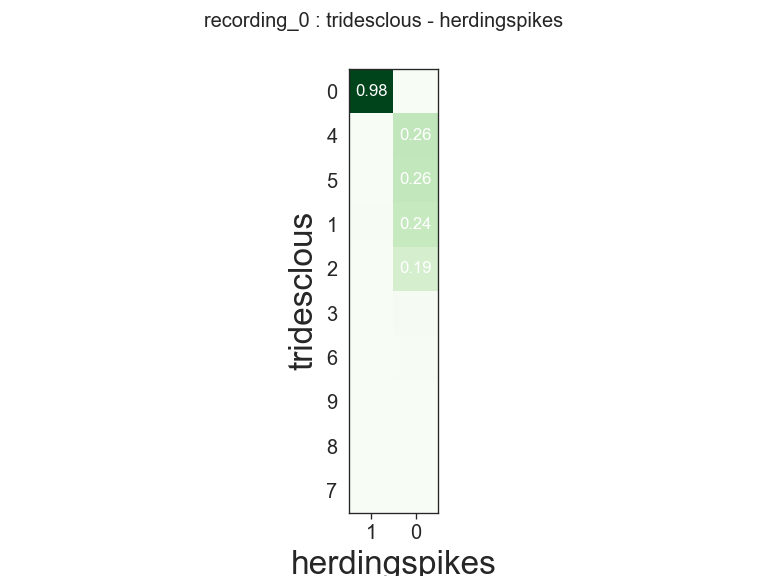

      0     1
0     3  1396
1  1312    17
2  1072     4
3    91     9
4  1405     5
5  1384     9
6    44     7
7     3     4
8    13     7
9    17     2
          0         1
0  0.000449  0.982407
1  0.242604  0.006009
2  0.191668  0.001435
3  0.013798  0.003211
4  0.264645  0.001764
5  0.259809  0.003182
6  0.006594  0.002468
7  0.000448  0.001415
8  0.001940  0.002472
9  0.002534  0.000702


<IPython.core.display.Javascript object>


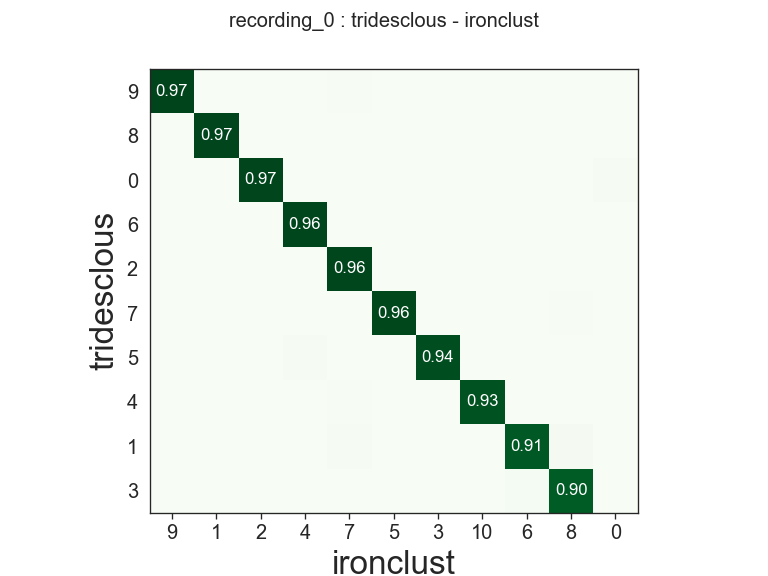

    0     1     2     3     4     5     6     7     8     9     10
0  174     3  1391     0     0     0     3     0     0     0     0
1    1     0     0     2     0     3  1344    25    59     1     0
2    1     0     1     0     0     3     3  1360     3     3     0
3    5     6     1     1     0     4    43     7  1327     6     0
4   25     0     3     0     0     0     1    12     3     0  1402
5   21     3     2  1376    23     4     3     2     5     2     1
6    6     7     1     6  1395     3     4     1     9     0     0
7    0     6     1     0     2  1384     1     0    16     1     0
8    3  1388     5     2     3    10     2     0    10     1     1
9    1     1     1     1     0     1     5    12     4  1406     1
         0         1         2         3         4         5         6   \
0  0.015036  0.001072  0.966644  0.000000  0.000000  0.000000  0.001075   
1  0.000085  0.000000  0.000000  0.000703  0.000000  0.001057  0.908722   
2  0.000085  0.000000  0.000357  0.000

<IPython.core.display.Javascript object>


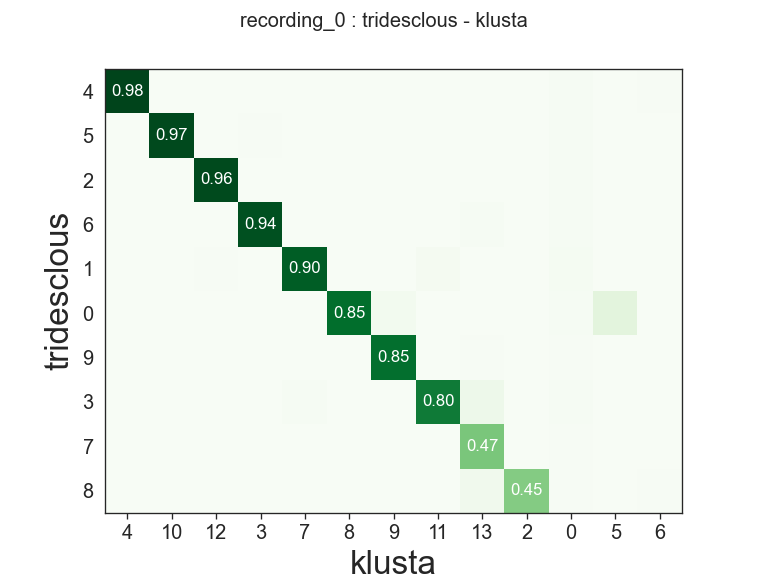

   0    2     3     4    5   6     7     8     9     10    11    12   13
0  19    0     0     0  187   5     0  1193    93     0     0     0    7
1  25    1     0     0    1   1  1325     0     1     0    51    20    7
2  13    0     0     0    1   1     2     0     6     0     0  1348    1
3  16    2     0     0    0   2    39     0     2     0  1166     5  152
4  20    0     0  1398    0   6     0     0     1     0     0     2    1
5  17    0    20     0    0   0     0     0     1  1375     0     0    6
6  14    4  1364     0    0   1     1     0     0     8     0     0   20
7   7    0     1     0    0   2     1     0     0     0     6     0  814
8  11  639     2     0    0   8     3     2     2     2     0     0  116
9   9    0     0     0    0   3     1     0  1299     1     0     2   11
         0         2         3         4         5         6         7   \
0  0.012996  0.000000  0.000000  0.000000  0.133858  0.003401  0.000000   
1  0.016835  0.000483  0.000000  0.000000  0.00

<IPython.core.display.Javascript object>


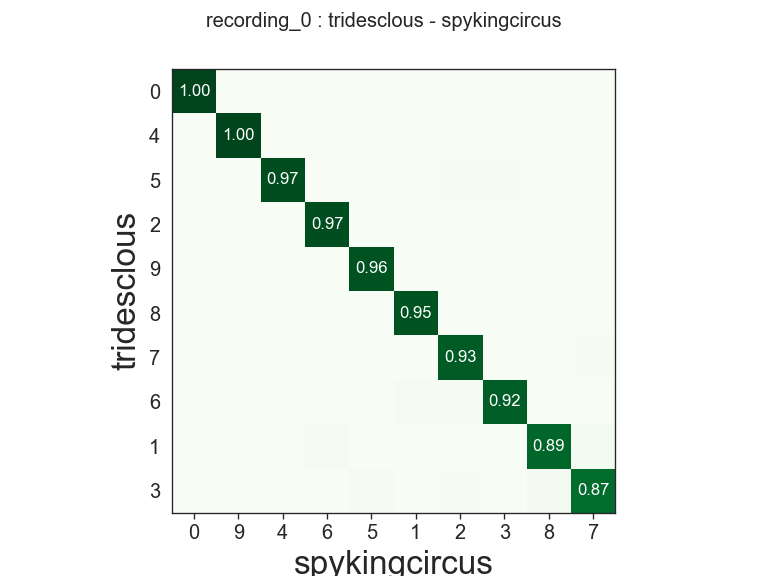

      0     1     2     3     4     5     6     7     8     9
0  1397     0     4     0     1     2     2     3     2     3
1     2     4     3     1     0    10    26    71  1321     2
2     2     1     2     1     0     8  1360     0     4     4
3     4     4    17     6     2    26     8  1290    53     0
4     3     1     0     2     3     4     7     0     2  1414
5     2     0    18    19  1375     9     2     0     1     4
6     1    36    35  1335     8     5     2     0     6     1
7     1     2  1376     4     2     5     1    13     3     0
8     5  1388     8     6     2     8     1     2     5     2
9     0     1     0     0     2  1418     8     1     4     1
          0         1         2         3         4         5         6  \
0  0.999285  0.000000  0.001407  0.000000  0.000360  0.000698  0.000716   
1  0.000709  0.001405  0.001044  0.000359  0.000000  0.003464  0.009296   
2  0.000723  0.000358  0.000709  0.000366  0.000000  0.002823  0.965909   
3  0.001436  0.001

<IPython.core.display.Javascript object>


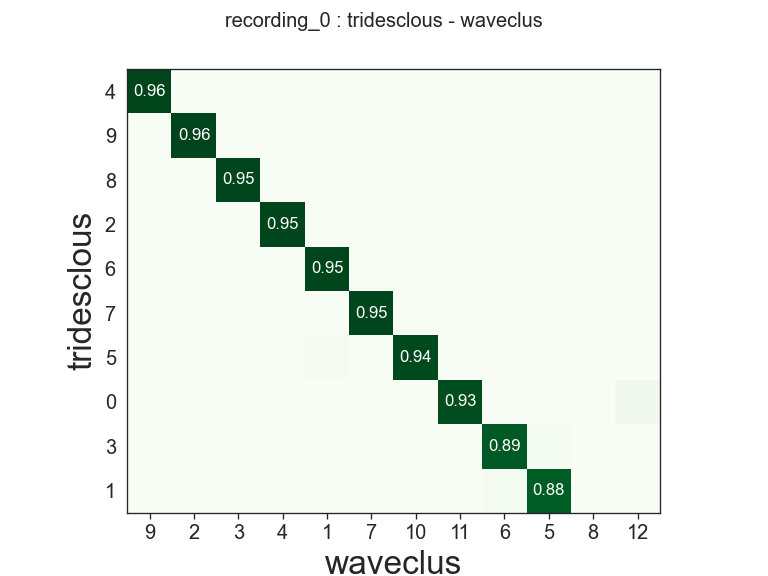

     1     2     3     4     5     6     7   8     9     10    11  12
0     0     0     0     0     0     0     0   0     0     0  1293  57
1     0     0     0    14  1301    49     0   0     0     0     0   0
2     0     2     0  1324     4     2     1   0     1     0     0   0
3     2     7     0     6    44  1296     4   0     0     0     0   0
4     0     0     0     0     0     0     3   0  1360     0     1   0
5    23     0     0     1     4     1     8   0     1  1337     0   2
6  1375     0     2     0     6     3     2   0     0     8     0   1
7     2     3     0     0     1    12  1351   0     0     0     1   0
8     6     2  1349     0     3     7     7   0     1     1     5   0
9     1  1381     1     6     3     1     0   0     1     0     0   0
         1         2         3         4         5         6         7    8   \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1  0.000000  0.000000  0.000000  0.005072  0.882034  0.017903  0.00000

<IPython.core.display.Javascript object>


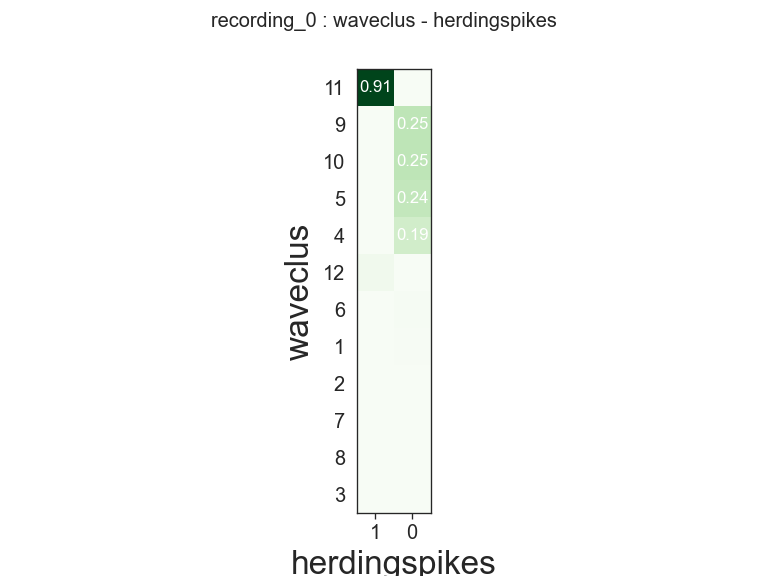

       0     1
1     33     0
2      6     0
3      0     0
4   1056     0
5   1293     8
6     49     1
7      4     1
8      0     0
9   1351     0
10  1339     1
11     0  1293
12     1    57
           0         1
1   0.004951  0.000000
2   0.000898  0.000000
3   0.000000  0.000000
4   0.189044  0.000000
5   0.241637  0.002896
6   0.007419  0.000360
7   0.000601  0.000359
8   0.000000  0.000000
9   0.254665  0.000000
10  0.252737  0.000362
11  0.000000  0.910563
12  0.000187  0.039888


<IPython.core.display.Javascript object>


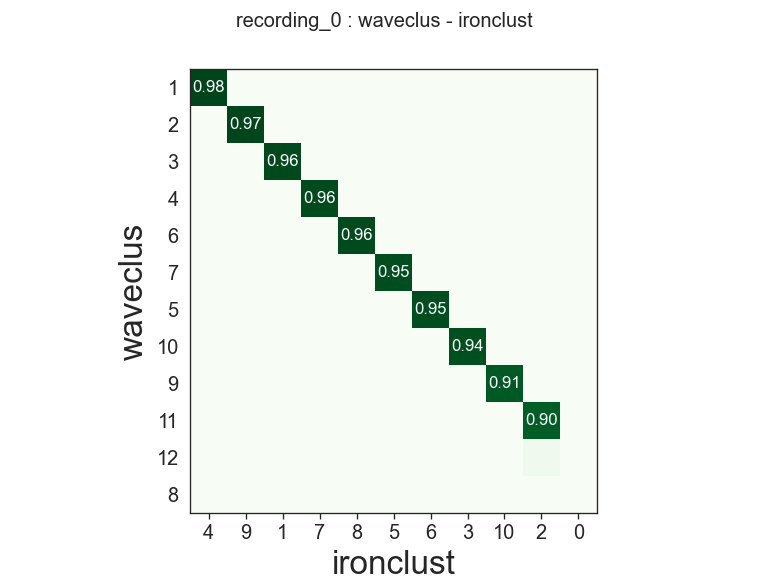

    0     1     2     3     4     5     6     7     8     9     10
1    7     2     0     3  1397     2     0     0     1     0     0
2    1     2     0     0     0     3     0     2     1  1388     0
3    5  1351     0     0     0     0     0     0     0     0     0
4    5     0     0     0     0     1     0  1346     1     1     0
5    1     0     0     2     0     1  1336     4     8     0     0
6    8     4     0     0     1     2     0     1  1355     0     0
7    3     4     0     6     1  1354     0     3     0     0     0
8   14     0     0     0     0     0     0     0     0     0     0
9   28     0     0     0     0     0     0     1     0     0  1361
10  24     2     0  1340     1     1     0     0     0     0     0
11  10     0  1293     0     0     0     0     0     0     0     0
12   1     0    64     1     0     0     0     0     0     0     0
          0         1         2         3         4         5         6   \
1   0.000596  0.000713  0.000000  0.001063  0.979663 

<IPython.core.display.Javascript object>


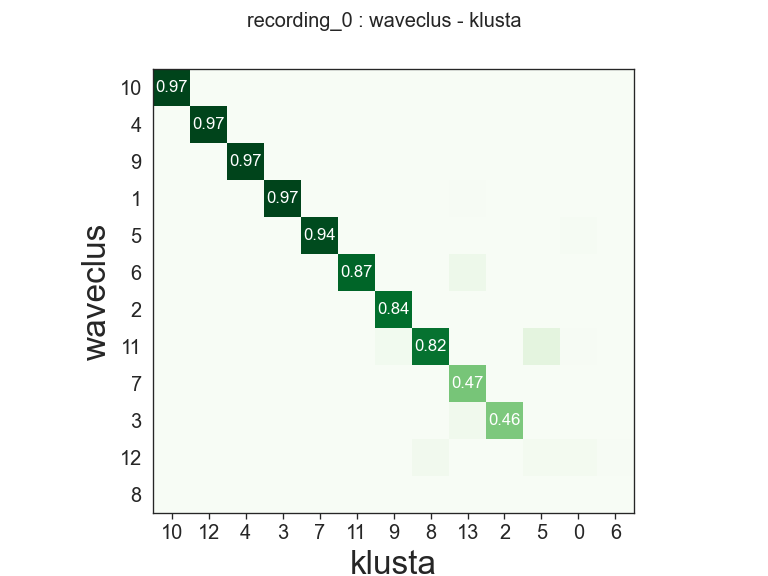

    0    2     3     4    5   6     7     8     9     10    11    12   13
1    3    3  1371     0    0   0     0     0     0     4     0     0   12
2    0    0     0     0    0   1     0     0  1277     0     1     3    8
3    1  629     0     0    0   5     0     0     1     0     0     0  105
4    3    0     0     0    0   1     0     0     5     1     0  1339    1
5   19    0     0     0    0   1  1319     0     1     0     2     5    6
6    4    2     0     0    0   1     3     0     0     0  1200     1  143
7    3    1     1     0    0   3     0     0     0     3     0     0  799
8    0    0     0     0    0   0     0     0     0     0     0     0    0
9    4    0     0  1357    0   5     0     0     0     1     0     0    0
10   1    0     1     0    0   0     0     0     0  1340     0     0    2
11   9    0     0     0  163   1     0  1122    90     0     0     0    4
12   4    0     0     0    7   1     0    49     3     0     0     0    2
          0         2         3       

<IPython.core.display.Javascript object>


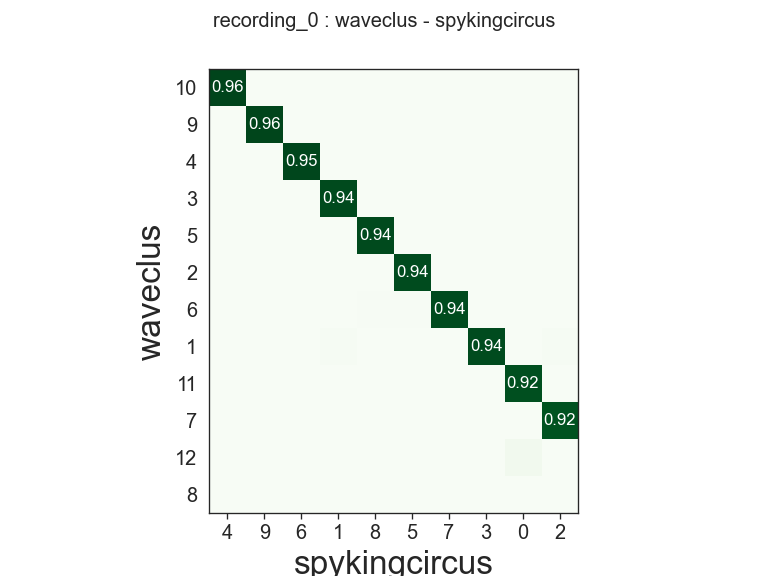

       0     1     2     3     4     5     6     7     8     9
1      0    27    32  1339     1     3     0     1     0     0
2      0     0     4     0     0  1388     2     0     0     0
3      0  1347     0     0     0     1     0     0     0     0
4      0     0     0     0     1     7  1340     0     1     0
5      0     3     2     4     0     9     9    10  1321     0
6      0     5     8     4     1    11     1  1324    15     0
7      0     3  1348     3     7     2     1     3     0     2
8      0     0     0     0     0     0     0     0     0     0
9      0     1     0     0     1     2     0     0     0  1358
10     0     0     6     0  1335     2     0     0     0     0
11  1293     0     2     0     0     1     0     0     0     1
12    56     0     1     0     1     0     0     0     0     0
           0         1         2         3         4         5         6  \
1   0.000000  0.009636  0.011339  0.938332  0.000359  0.001045  0.000000   
2   0.000000  0.000000  0.001

<IPython.core.display.Javascript object>


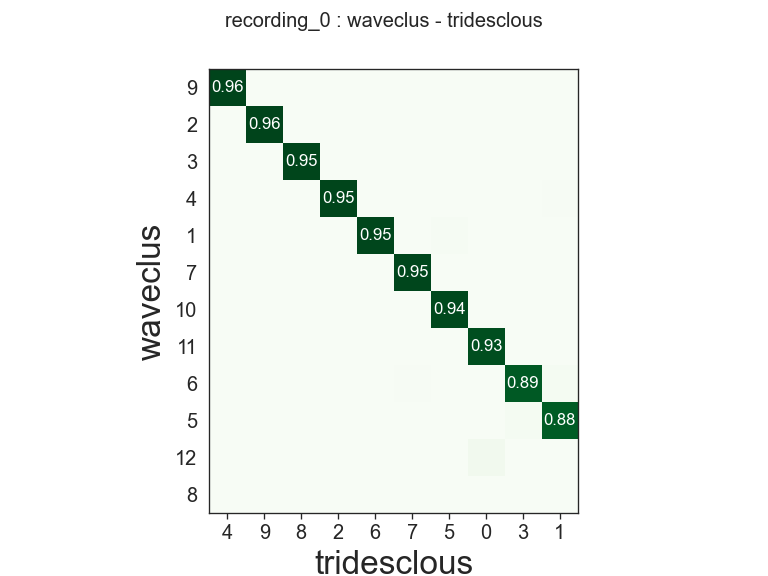

       0     1     2     3     4     5     6     7     8     9
1      0     0     0     2     0    23  1375     2     6     1
2      0     0     2     7     0     0     0     3     2  1381
3      0     0     0     0     0     0     2     0  1349     1
4      0    14  1324     6     0     1     0     0     0     6
5      0  1301     4    44     0     4     6     1     3     3
6      0    49     2  1296     0     1     3    12     7     1
7      0     0     1     4     3     8     2  1351     7     0
8      0     0     0     0     0     0     0     0     0     0
9      0     0     1     0  1360     1     0     0     1     1
10     0     0     0     0     0  1337     8     0     1     0
11  1293     0     0     0     1     0     0     1     5     0
12    57     0     0     0     0     2     1     0     0     0
           0         1         2         3         4         5         6  \
1   0.000000  0.000000  0.000000  0.000716  0.000000  0.008220  0.946970   
2   0.000000  0.000000  0.000

In [54]:
compareSorters(sorter_list[0])

<IPython.core.display.Javascript object>


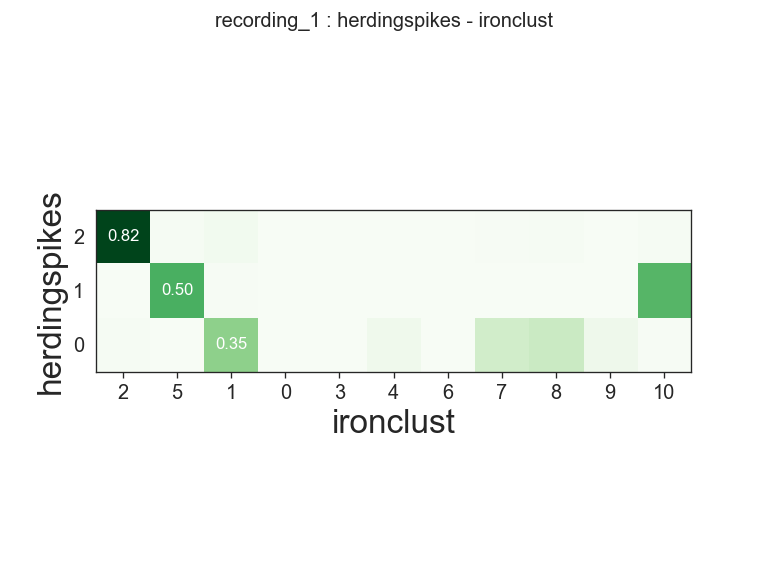

   0     1     2   3    4     5   6    7    8    9     10
0  17  1115    37   1  179     6   8  637  694  205    18
1  33    15     8   1    0  1384   4    5    5    7  1333
2   2    83  1352   0    0    22   6   16   23    0    28
         0         1         2         3        4         5         6   \
0  0.001253  0.351292  0.008557  0.000233  0.04368  0.001394  0.001866   
1  0.002463  0.003640  0.001905  0.000242  0.00000  0.499098  0.000966   
2  0.000164  0.029256  0.824390  0.000000  0.00000  0.007537  0.002054   

         7         8         9         10  
0  0.172162  0.193476  0.050307  0.004201  
1  0.001196  0.001213  0.001699  0.473198  
2  0.005420  0.007961  0.000000  0.009635  


<IPython.core.display.Javascript object>


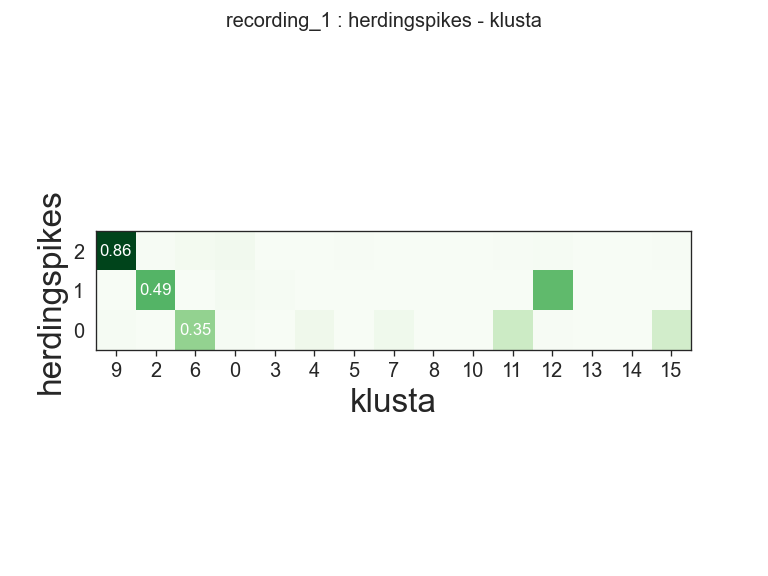

   0     2   3    4   5     6    7   8     9   10   11    12  13  14   15
0  22     3   2  198   1  1110  179   1    34   0  692    15   4   4  635
1  59  1365  27    7   1     6    3   4     3   0    2  1308   0   0    1
2  58    11   0    0   6    67    2   0  1339   5   19    26   0   1   12
         0         2         3         4         5         6         7   \
0  0.007266  0.000702  0.000507  0.049861  0.000338  0.352829  0.044952   
1  0.020789  0.494565  0.007169  0.001746  0.000356  0.001464  0.000749   
2  0.035736  0.003796  0.000000  0.000000  0.003781  0.023759  0.000717   

         8         9         10        11        12        13        14  \
0  0.000344  0.008021  0.000000  0.194273  0.003544  0.001371  0.000977   
1  0.001456  0.000729  0.000000  0.000488  0.469322  0.000000  0.000000   
2  0.000000  0.855591  0.003205  0.006629  0.009113  0.000000  0.000366   

         15  
0  0.173973  
1  0.000242  
2  0.004132  


<IPython.core.display.Javascript object>


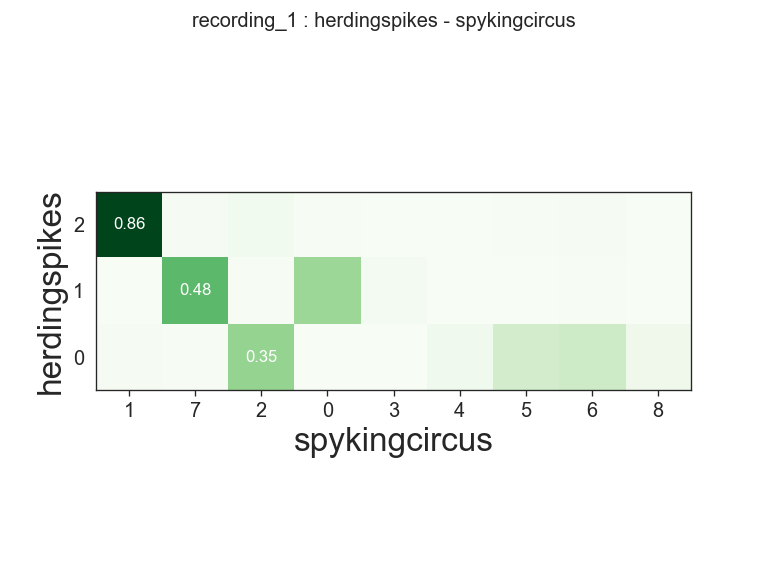

      0     1     2   3    4    5    6     7    8
0    17    33  1119   4  176  637  695    18  206
1  1382     6    21  93    7    6   24  1337    4
2    28  1348    88   5    2   19   25    32    8
          0         1         2         3         4         5         6  \
0  0.002989  0.007761  0.351776  0.000912  0.042906  0.173098  0.192895   
1  0.331415  0.001454  0.005090  0.022442  0.001700  0.001443  0.005824   
2  0.006500  0.859694  0.030953  0.001658  0.000688  0.006487  0.008609   

          7         8  
0  0.004220  0.050453  
1  0.478697  0.000968  
2  0.011103  0.002747  


<IPython.core.display.Javascript object>


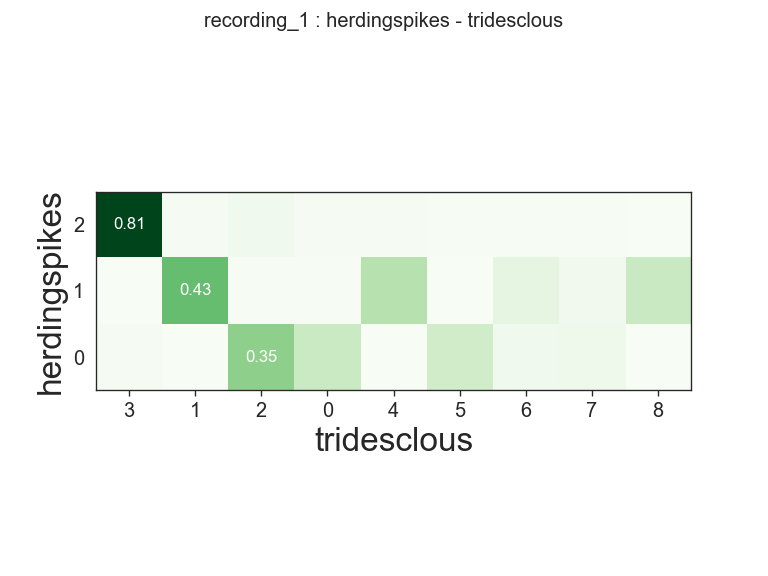

     0     1     2     3     4    5    6    7    8
0  696    14  1118    34     7  634  189  211    3
1   24  1209    24     7  1024    3  419  141  824
2   31    28   118  1273    28   20   15   14   13
          0         1         2         3         4         5         6  \
0  0.192958  0.003388  0.347421  0.008142  0.001317  0.172329  0.039589   
1  0.005817  0.434267  0.005771  0.001728  0.246985  0.000722  0.095422   
2  0.010679  0.010186  0.041418  0.811862  0.007132  0.006840  0.004191   

          7         8  
0  0.049882  0.000584  
1  0.034000  0.197934  
2  0.004578  0.003459  


<IPython.core.display.Javascript object>


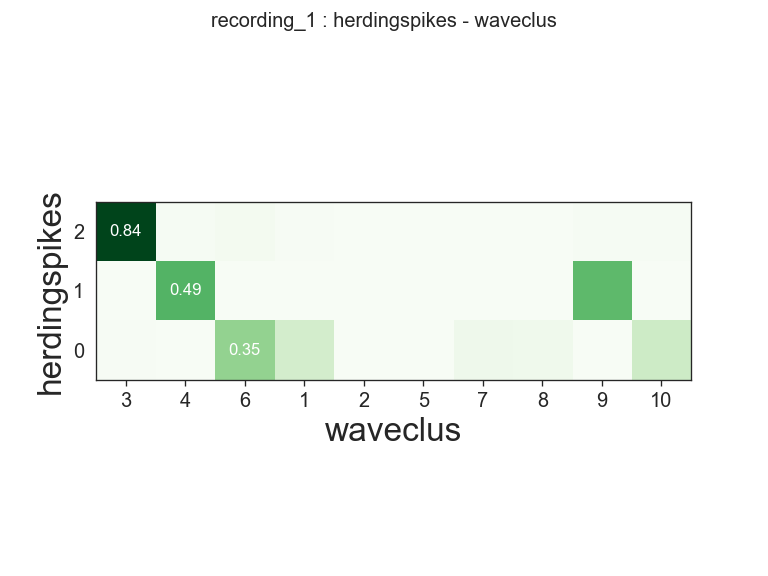

    1   2     3     4   5     6    7    8     9    10
0  622   1    23     3   6  1093  201  176     8  671
1    0   0     2  1357   0     7    0    0  1301    4
2   11   0  1314    23   1    71    1    0    27   23
         1         2         3         4         5         6         7   \
0  0.170598  0.000235  0.005454  0.000701  0.001414  0.347205  0.049851   
1  0.000000  0.000000  0.000490  0.489185  0.000000  0.001715  0.000000   
2  0.003809  0.000000  0.843931  0.007953  0.000347  0.025348  0.000349   

         8         9         10  
0  0.043532  0.001893  0.188748  
1  0.000000  0.467817  0.000983  
2  0.000000  0.009510  0.008116  


<IPython.core.display.Javascript object>


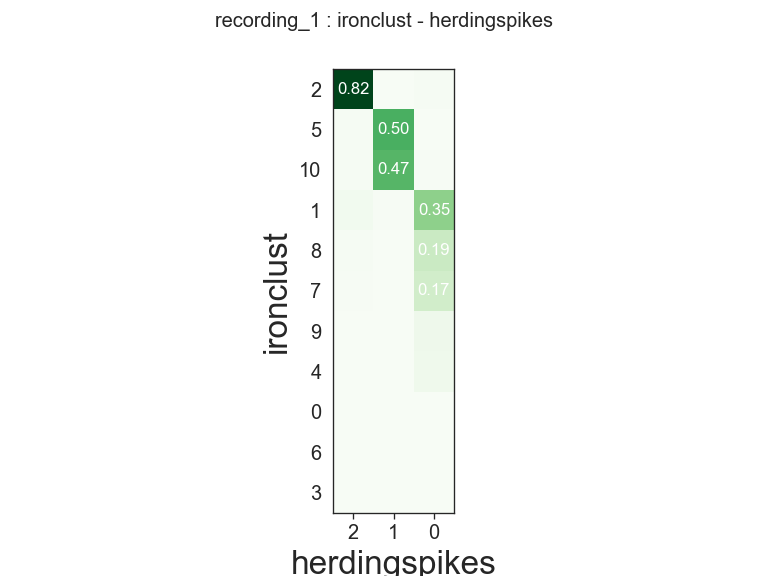

       0     1     2
0     17    33     2
1   1115    15    83
2     37     8  1352
3      1     1     0
4    179     0     0
5      6  1384    22
6      8     4     6
7    637     5    16
8    694     5    23
9    205     7     0
10    18  1333    28
           0         1         2
0   0.001253  0.002463  0.000164
1   0.351292  0.003640  0.029256
2   0.008557  0.001905  0.824390
3   0.000233  0.000242  0.000000
4   0.043680  0.000000  0.000000
5   0.001394  0.499098  0.007537
6   0.001866  0.000966  0.002054
7   0.172162  0.001196  0.005420
8   0.193476  0.001213  0.007961
9   0.050307  0.001699  0.000000
10  0.004201  0.473198  0.009635


<IPython.core.display.Javascript object>


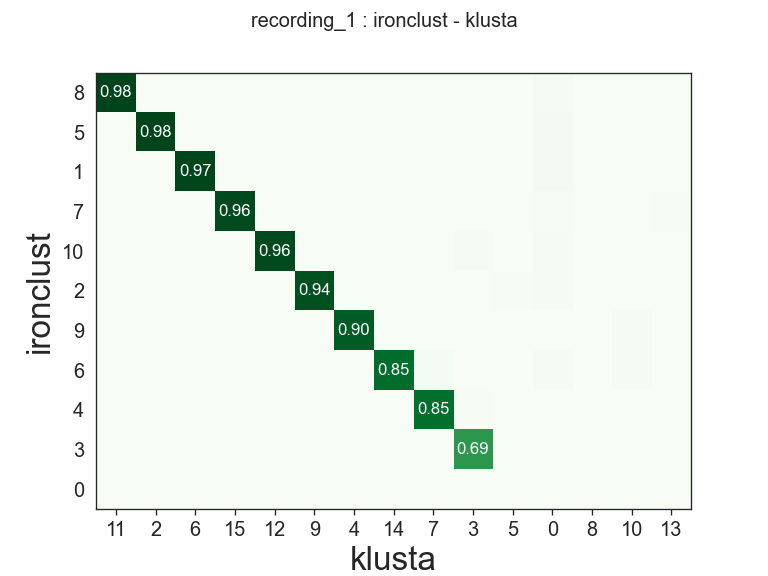

    0     2    3     4   5     6     7   8     9   10    11    12  13    14  \
0    1     0    3    30  35    13     4   0     2   1     1    33  10     9   
1   37     0    0     0   0  1357     3   0     2   0     0     0   0     0   
2   24     0    1     0   6     2     1   0  1374   5     0     2   0     2   
3    2     1  999     1   0     0     1   0     0   4     0     0   0     0   
4    2     0   13     0   2     0  1213   0     0   0     0     0   0     2   
5   32  1381    0     0   0     0     0   0     0   0     0     0   0     0   
6   17     0    6     5   1     0    46   0     0  15     1     0   1  1198   
7    8     0    0     4   2     1     1   0     0   0     2     1   8     0   
8   22     0    3     0   0     0     0   0     0   0  1356     0   0     0   
9    2     0    0  1261   0     0     1   2     0  12     0     7   1     0   
10  27     2   26     5   1     1     3   5     0   0     1  1349   0     0   

      15  
0      4  
1      1  
2      1  
3      

<IPython.core.display.Javascript object>


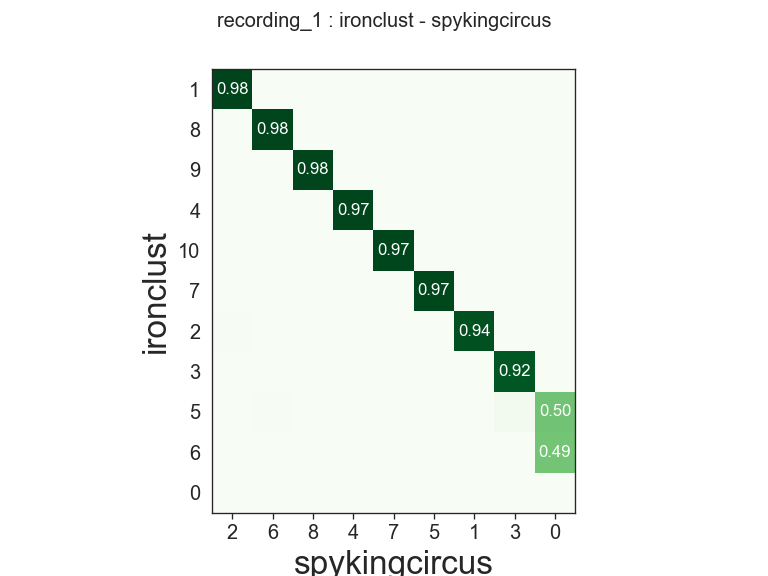

       0     1     2     3     4     5     6     7     8
0     11     2    11     3     6     1     1    33    44
1      6     5  1385     0     3     6     4     3     0
2      7  1382    11     0     2     2     2     0     7
3      3     0     0  1386     1     0     1     0     0
4     14     0     2     2  1363     0     0     0     0
5   1401     1     5    96     5     2    16     3     3
6   1379     0     5     0     7     3     5     2     7
7      3     1     1     2     2  1408     2     5     2
8      3     0     0     3     1     2  1377     1     3
9      2     0     0     0     0     0     0     7  1370
10     6     1     5     3     2     1     1  1378     1
           0         1         2         3         4         5         6  \
0   0.000816  0.000166  0.000910  0.000246  0.000497  0.000083  0.000083   
1   0.001431  0.001802  0.982270  0.000000  0.001083  0.002138  0.001434   
2   0.001641  0.940136  0.003852  0.000000  0.000703  0.000694  0.000699   
3   0.000714

<IPython.core.display.Javascript object>


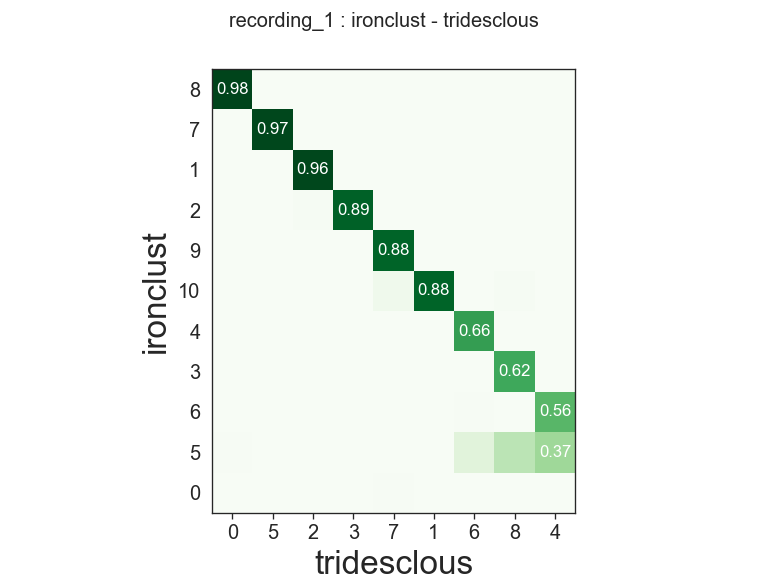

       0     1     2     3     4     5     6     7     8
0      1    30    15     4    10     5     7    54     3
1      5     2  1390     4     6     5     8     1     0
2      2     1    40  1305     9     1     6     5     1
3      0     0     0     1     1     1     3     0  1395
4      0     0     3     0     4     0  1372     0     3
5     11     2     5     3  1038     1   422    10   798
6      4     1     5     2  1366     3    18     5     4
7      8     4     2     0     2  1403     2     6     0
8   1379     0     0     0     2     3     7     7     4
9      1     6     0     0     1     0     1  1371     0
10     2  1242     5     1     5     1     5   140    39
           0         1         2         3         4         5         6  \
0   0.000083  0.002519  0.001238  0.000333  0.000763  0.000413  0.000549   
1   0.001790  0.000758  0.964608  0.001481  0.001574  0.001784  0.002319   
2   0.000697  0.000369  0.013971  0.886549  0.002319  0.000347  0.001703   
3   0.000000

<IPython.core.display.Javascript object>


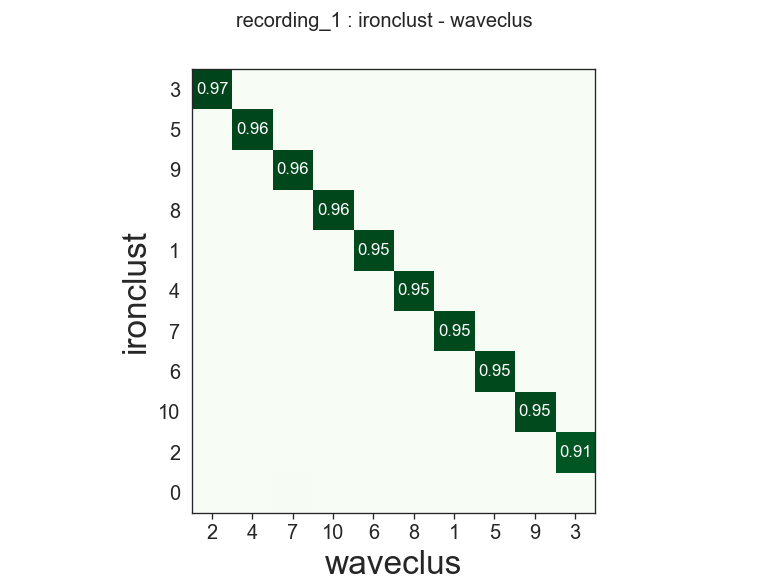

      1     2     3     4     5     6     7     8     9     10
0     13     4     8     7     8    15    57     7     9     2
1      0     0     1     8     3  1335     0     0     0     0
2      0     0  1341     2     1     3     0     0     1     0
3      0  1357     0     0     2     0     0     1     0     0
4      0     0     0     0     2     0     0  1318     0     0
5      0     0     0  1371     1     0     0     0     0     0
6      0     0     1     3  1341     2     2     4     1     1
7   1371     0     0     0     2     1     1     0     1     4
8      0     0     0     3     2     0     0     0     0  1326
9      0     2     0     0     2     0  1329     0     1     0
10     0     0     0     2     0     0     1     0  1336     0
          1         2         3         4         5         6         7   \
0   0.001079  0.000332  0.000665  0.000580  0.000665  0.001248  0.004762   
1   0.000000  0.000000  0.000366  0.002887  0.001095  0.952891  0.000000   
2   0.000000  0.

<IPython.core.display.Javascript object>


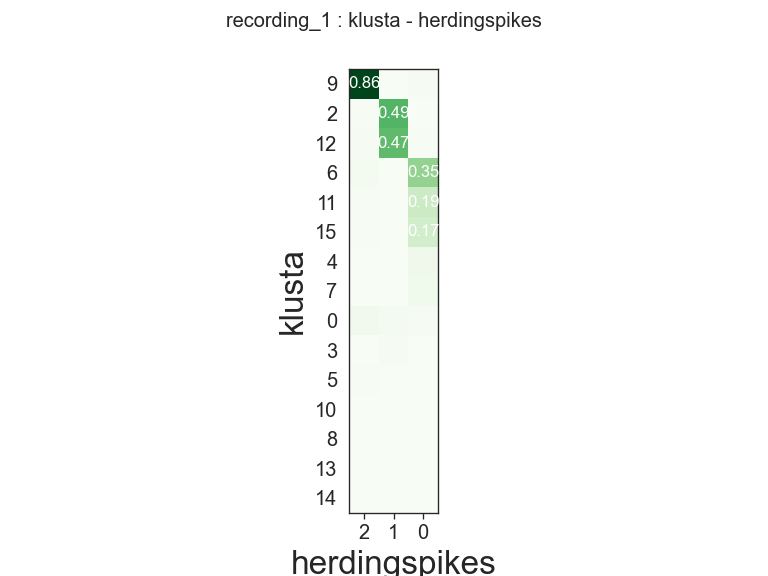

       0     1     2
0     22    59    58
2      3  1365    11
3      2    27     0
4    198     7     0
5      1     1     6
6   1110     6    67
7    179     3     2
8      1     4     0
9     34     3  1339
10     0     0     5
11   692     2    19
12    15  1308    26
13     4     0     0
14     4     0     1
15   635     1    12
           0         1         2
0   0.007266  0.020789  0.035736
2   0.000702  0.494565  0.003796
3   0.000507  0.007169  0.000000
4   0.049861  0.001746  0.000000
5   0.000338  0.000356  0.003781
6   0.352829  0.001464  0.023759
7   0.044952  0.000749  0.000717
8   0.000344  0.001456  0.000000
9   0.008021  0.000729  0.855591
10  0.000000  0.000000  0.003205
11  0.194273  0.000488  0.006629
12  0.003544  0.469322  0.009113
13  0.001371  0.000000  0.000000
14  0.000977  0.000000  0.000366
15  0.173973  0.000242  0.004132


<IPython.core.display.Javascript object>


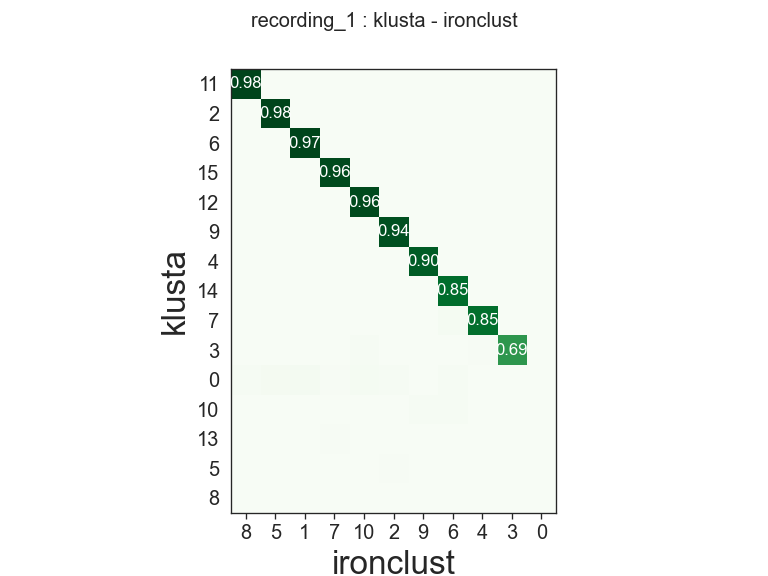

    0     1     2    3     4     5     6     7     8     9     10
0    1    37    24    2     2    32    17     8    22     2    27
2    0     0     0    1     0  1381     0     0     0     0     2
3    3     0     1  999    13     0     6     0     3     0    26
4   30     0     0    1     0     0     5     4     0  1261     5
5   35     0     6    0     2     0     1     2     0     0     1
6   13  1357     2    0     0     0     0     1     0     0     1
7    4     3     1    1  1213     0    46     1     0     1     3
8    0     0     0    0     0     0     0     0     0     2     5
9    2     2  1374    0     0     0     0     0     0     0     0
10   1     0     5    4     0     0    15     0     0    12     0
11   1     0     0    0     0     0     1     2  1356     0     1
12  33     0     2    0     0     0     0     1     0     7  1349
13  10     0     0    0     0     0     1     8     0     1     0
14   9     0     2    0     2     0  1198     0     0     0     0
15   4    

<IPython.core.display.Javascript object>


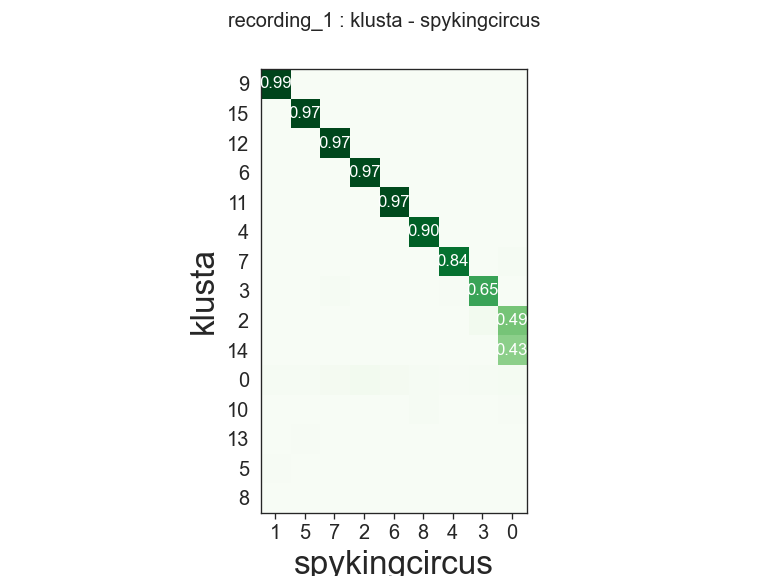

       0     1     2    3     4     5     6     7     8
0     51    17    47   14     7    15    32    31    17
2   1374     0     0   90     3     0     8     1     1
3      5     1     0  998    14     0     4    26     0
4      2     0     0    1     0     0     0     7  1264
5      1     6     0    0     2     2     0     1     0
6      0     1  1358    0     0     1     0     1     0
7     51     1     3    1  1209     1     0     3     1
8      0     0     0    0     0     0     0     5     2
9      0  1374     2    0     1     0     1     0     0
10    16     5     0    3     0     0     0     0    14
11     0     0     0    1     0     1  1355     2     0
12     1     0     1    0     0     1     1  1350     1
13     1     0     0    0     0     8     0     0     1
14  1202     0     0    0     0     0     0     0     1
15     0     1     1    0     0  1386     2     1     0
           0         1         2         3         4         5         6  \
0   0.017526  0.011155  0.03

<IPython.core.display.Javascript object>


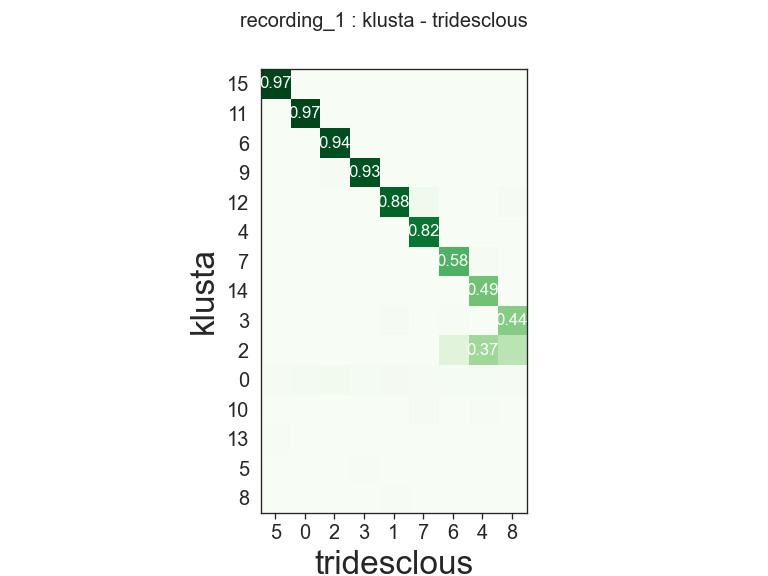

       0     1     2     3     4     5     6     7     8
0     35    31    51    22    42    15    36    23    20
2      6     0     0     0  1018     0   407     8   789
3      3    26     0     1     5     1    16     0  1000
4      1     6     0     0     1     0     1  1265     1
5      0     1     0     6     1     2     2     0     0
6      0     1  1358     1     0     1     0     0     0
7      0     3     2     2    44     1  1216     1     1
8      0     5     0     0     0     0     0     2     0
9      1     0    34  1294     0     0     2     0     0
10     0     0     0     5    16     0     0    14     3
11  1357     2     0     0     0     0     0     2     1
12     2  1215     1     0     0     0     0   135    36
13     0     0     0     0     1     8     0     1     0
14     0     0     0     0  1194     0     7     1     0
15     5     1     1     0     0  1382     0     0     0
           0         1         2         3         4         5         6  \
0   0.022966

<IPython.core.display.Javascript object>


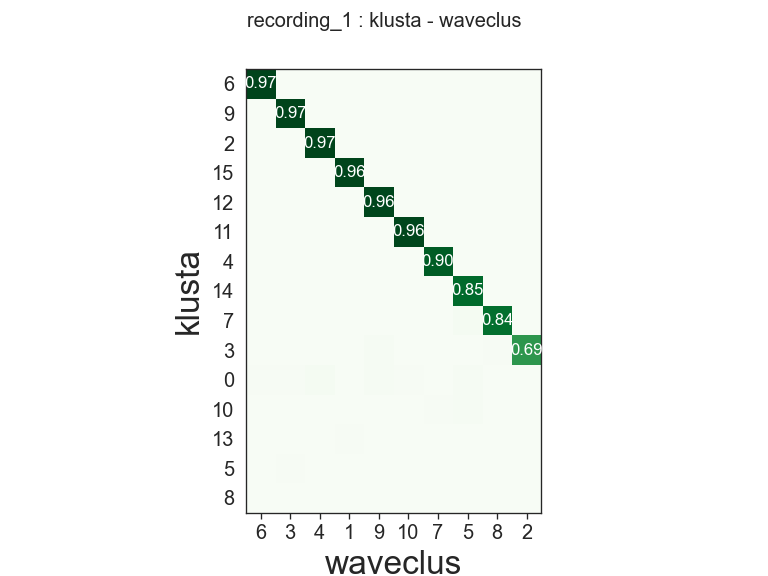

      1    2     3     4     5     6     7     8     9     10
0      1    0    10    25    12    11     0     0    19     9
2      0    0     0  1361     0     0     0     0     0     0
3      0  980     0     0     5     0     0    13    26     3
4      0    1     0     0     2     0  1233     0     3     0
5      1    0     6     0     1     0     0     0     1     0
6      0    0     0     0     0  1331     0     0     0     0
7      0    1     0     0    42     0     0  1177     3     1
8      0    0     0     0     0     0     2     0     2     0
9      0    0  1337     0     0     1     0     0     0     0
10     0    3     5     0    15     0     6     0     0     0
11     0    0     0     1     0     0     0     0     0  1315
12     0    0     0     1     0     0     1     0  1318     0
13     8    0     0     0     0     0     1     0     0     0
14     0    0     0     1  1177     0     0     2     0     0
15  1354    0     0     0     0     2     1     0     0     1
        

<IPython.core.display.Javascript object>


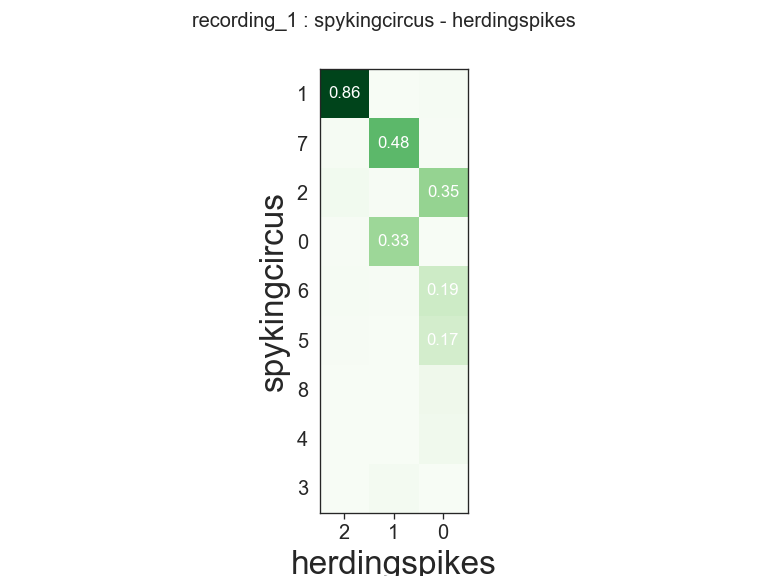

      0     1     2
0    17  1382    28
1    33     6  1348
2  1119    21    88
3     4    93     5
4   176     7     2
5   637     6    19
6   695    24    25
7    18  1337    32
8   206     4     8
          0         1         2
0  0.002989  0.331415  0.006500
1  0.007761  0.001454  0.859694
2  0.351776  0.005090  0.030953
3  0.000912  0.022442  0.001658
4  0.042906  0.001700  0.000688
5  0.173098  0.001443  0.006487
6  0.192895  0.005824  0.008609
7  0.004220  0.478697  0.011103
8  0.050453  0.000968  0.002747


<IPython.core.display.Javascript object>


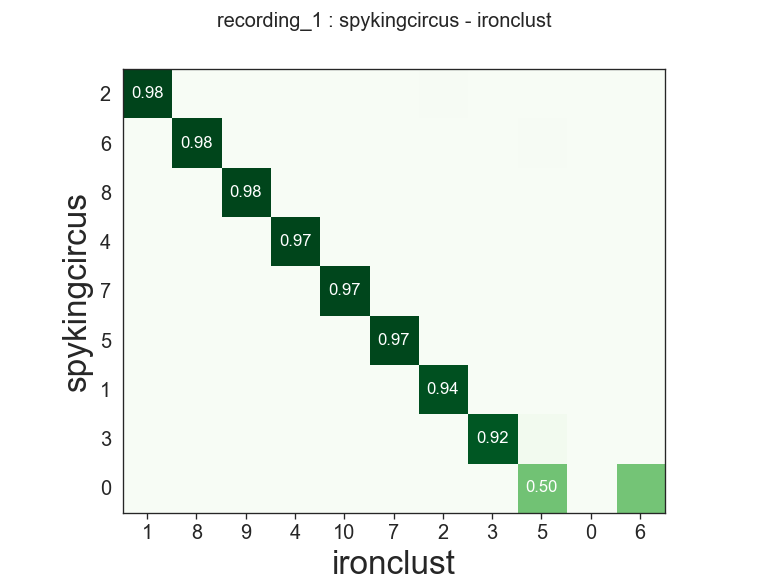

   0     1     2     3     4     5     6     7     8     9     10
0  11     6     7     3    14  1401  1379     3     3     2     6
1   2     5  1382     0     0     1     0     1     0     0     1
2  11  1385    11     0     2     5     5     1     0     0     5
3   3     0     0  1386     2    96     0     2     3     0     3
4   6     3     2     1  1363     5     7     2     1     0     2
5   1     6     2     0     0     2     3  1408     2     0     1
6   1     4     2     1     0    16     5     2  1377     0     1
7  33     3     0     0     0     3     2     5     1     7  1378
8  44     0     7     0     0     3     7     2     3  1370     1
         0         1         2         3         4         5         6   \
0  0.000816  0.001431  0.001641  0.000714  0.003354  0.496809  0.487624   
1  0.000166  0.001802  0.940136  0.000000  0.000000  0.000357  0.000000   
2  0.000910  0.982270  0.003852  0.000000  0.000719  0.001779  0.001788   
3  0.000246  0.000000  0.000000  0.92154

<IPython.core.display.Javascript object>


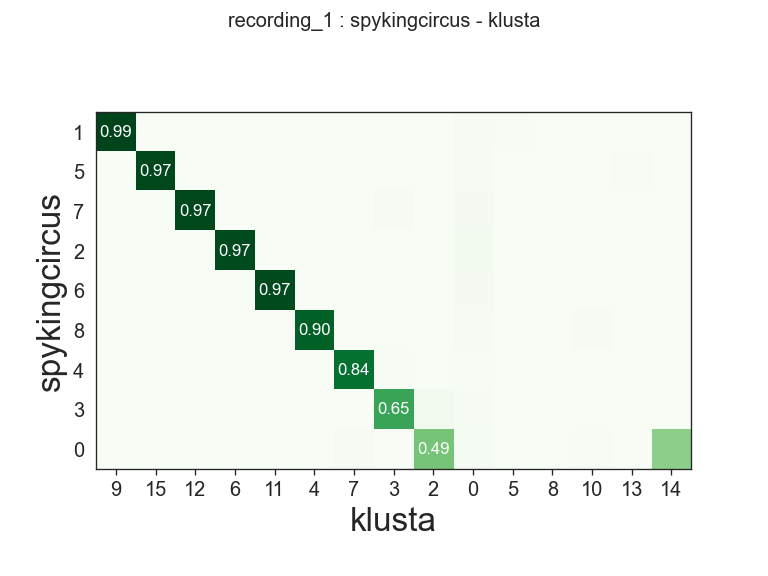

   0     2    3     4   5     6     7   8     9   10    11    12  13    14  \
0  51  1374    5     2   1     0    51   0     0  16     0     1   1  1202   
1  17     0    1     0   6     1     1   0  1374   5     0     0   0     0   
2  47     0    0     0   0  1358     3   0     2   0     0     1   0     0   
3  14    90  998     1   0     0     1   0     0   3     1     0   0     0   
4   7     3   14     0   2     0  1209   0     1   0     0     0   0     0   
5  15     0    0     0   2     1     1   0     0   0     1     1   8     0   
6  32     8    4     0   0     0     0   0     1   0  1355     1   0     0   
7  31     1   26     7   1     1     3   5     0   0     2  1350   0     0   
8  17     1    0  1264   0     0     1   2     0  14     0     1   1     1   

     15  
0     0  
1     1  
2     1  
3     0  
4     0  
5  1386  
6     2  
7     1  
8     0  
         0         2         3         4         5         6         7   \
0  0.017526  0.488099  0.001298  0.000490  0

<IPython.core.display.Javascript object>


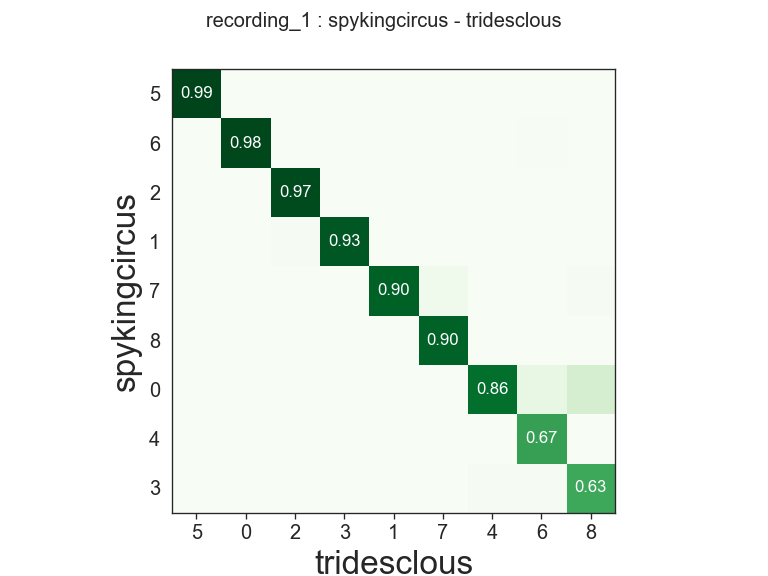

      0     1     2     3     4     5     6     7     8
0    13     5    10     6  2415     5   436    15   797
1     2     1    37  1303     2     1     3     2     0
2     2     6  1396     7     8     5    13     4     0
3     6     3     3     0    47     0    53     6  1449
4     1     2     4     2     3     1  1377     0     3
5     7     3     7     2     4  1411     2     3     0
6  1387     2     4     1     9     4    16     4    12
7     7  1248     7     1     5     1     4   141    40
8     3     2     5     2     8     0     2  1388     1
          0         1         2         3         4         5         6  \
0  0.003095  0.001234  0.002360  0.001458  0.856687  0.001185  0.098242   
1  0.000716  0.000379  0.013262  0.932046  0.000525  0.000357  0.000869   
2  0.000713  0.002268  0.965422  0.002584  0.002094  0.001777  0.003762   
3  0.002074  0.001095  0.001024  0.000000  0.012138  0.000000  0.015117   
4  0.000359  0.000761  0.001420  0.000743  0.000789  0.000358  0.

<IPython.core.display.Javascript object>


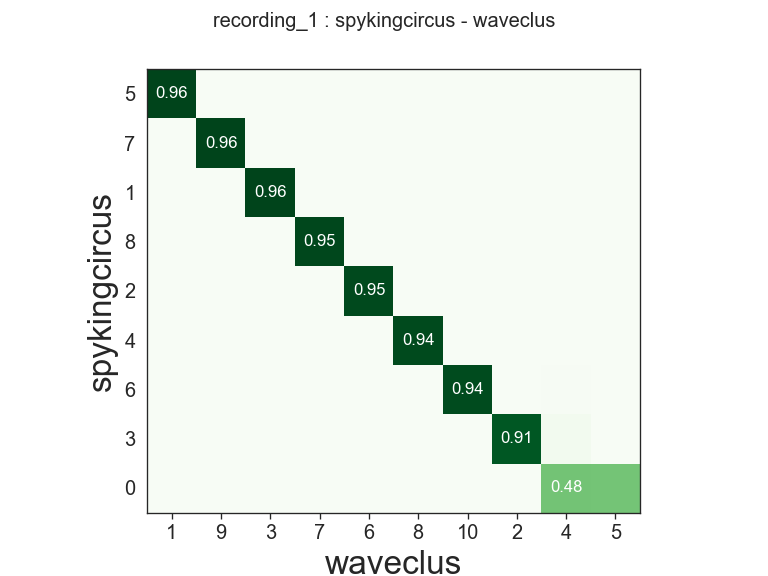

     1     2     3     4     5     6     7     8     9     10
0     0     0     1  1368  1347     1     0    10     2     1
1     0     0  1338     1     1     2     0     0     0     0
2     0     0     1    10     1  1336     0     0     0     0
3     0  1356     0    85     3     0     0     1     3     3
4     0     0     0     1     2     0     0  1312     2     1
5  1369     0     2     4     1     3     1     0     1     4
6     0     0     0    16     0     1     0     0     0  1322
7     0     0     0     2     0     0     1     0  1335     0
8     0     2     3     5     6     1  1328     0     2     1
         1         2         3         4         5         6         7   \
0  0.000000  0.000000  0.000241  0.483905  0.479018  0.000241  0.000000   
1  0.000000  0.000000  0.960517  0.000360  0.000365  0.000733  0.000000   
2  0.000000  0.000000  0.000364  0.003597  0.000363  0.946846  0.000000   
3  0.000000  0.905207  0.000000  0.030411  0.001056  0.000000  0.000000   
4  0.

<IPython.core.display.Javascript object>


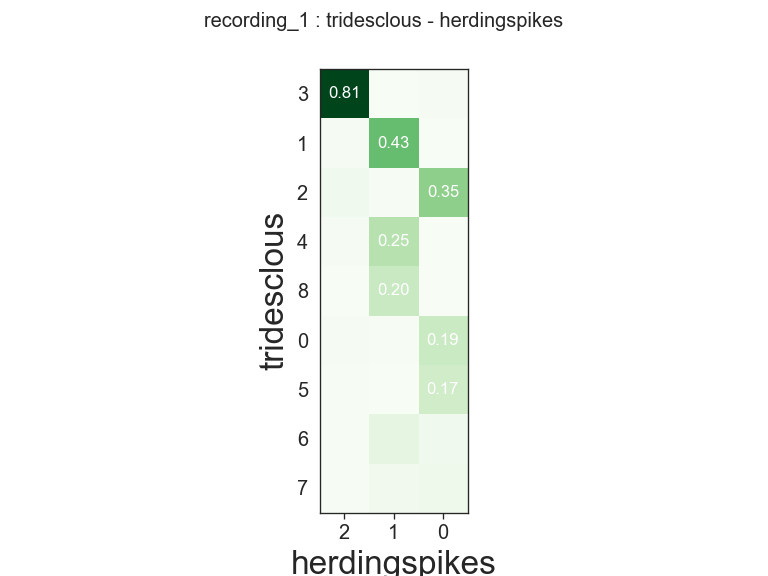

      0     1     2
0   696    24    31
1    14  1209    28
2  1118    24   118
3    34     7  1273
4     7  1024    28
5   634     3    20
6   189   419    15
7   211   141    14
8     3   824    13
          0         1         2
0  0.192958  0.005817  0.010679
1  0.003388  0.434267  0.010186
2  0.347421  0.005771  0.041418
3  0.008142  0.001728  0.811862
4  0.001317  0.246985  0.007132
5  0.172329  0.000722  0.006840
6  0.039589  0.095422  0.004191
7  0.049882  0.034000  0.004578
8  0.000584  0.197934  0.003459


<IPython.core.display.Javascript object>


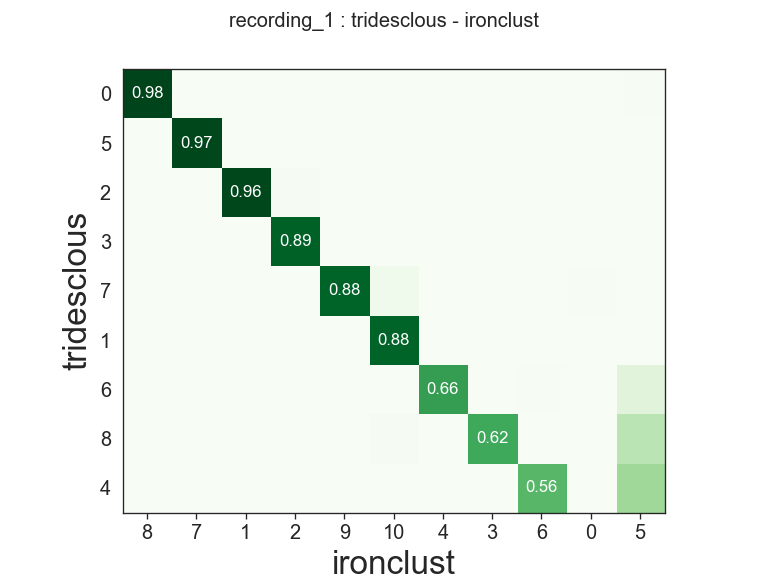

   0     1     2     3     4     5     6     7     8     9     10
0   1     5     2     0     0    11     4     8  1379     1     2
1  30     2     1     0     0     2     1     4     0     6  1242
2  15  1390    40     0     3     5     5     2     0     0     5
3   4     4  1305     1     0     3     2     0     0     0     1
4  10     6     9     1     4  1038  1366     2     2     1     5
5   5     5     1     1     0     1     3  1403     3     0     1
6   7     8     6     3  1372   422    18     2     7     1     5
7  54     1     5     0     0    10     5     6     7  1371   140
8   3     0     1  1395     3   798     4     0     4     0    39
         0         1         2         3         4         5         6   \
0  0.000083  0.001790  0.000697  0.000000  0.000000  0.003917  0.001428   
1  0.002519  0.000758  0.000369  0.000000  0.000000  0.000752  0.000378   
2  0.001238  0.964608  0.013971  0.000000  0.001065  0.001756  0.001765   
3  0.000333  0.001481  0.886549  0.00036

<IPython.core.display.Javascript object>


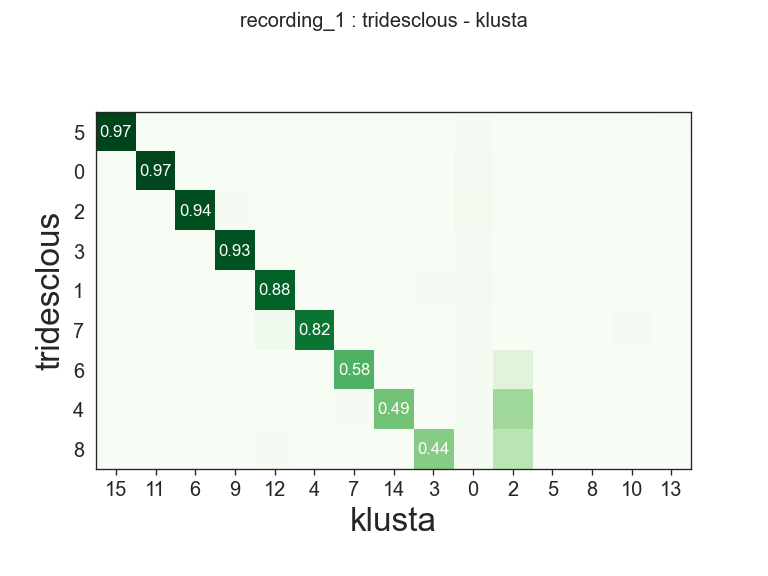

   0     2     3     4   5     6     7   8     9   10    11    12  13    14  \
0  35     6     3     1   0     0     0   0     1   0  1357     2   0     0   
1  31     0    26     6   1     1     3   5     0   0     2  1215   0     0   
2  51     0     0     0   0  1358     2   0    34   0     0     1   0     0   
3  22     0     1     0   6     1     2   0  1294   5     0     0   0     0   
4  42  1018     5     1   1     0    44   0     0  16     0     0   1  1194   
5  15     0     1     0   2     1     1   0     0   0     0     0   8     0   
6  36   407    16     1   2     0  1216   0     2   0     0     0   0     7   
7  23     8     0  1265   0     0     1   2     0  14     2   135   1     1   
8  20   789  1000     1   0     0     1   0     0   3     1    36   0     0   

     15  
0     5  
1     1  
2     1  
3     0  
4     0  
5  1382  
6     0  
7     0  
8     0  
         0         2         3         4         5         6         7   \
0  0.022966  0.002157  0.001223  0

<IPython.core.display.Javascript object>


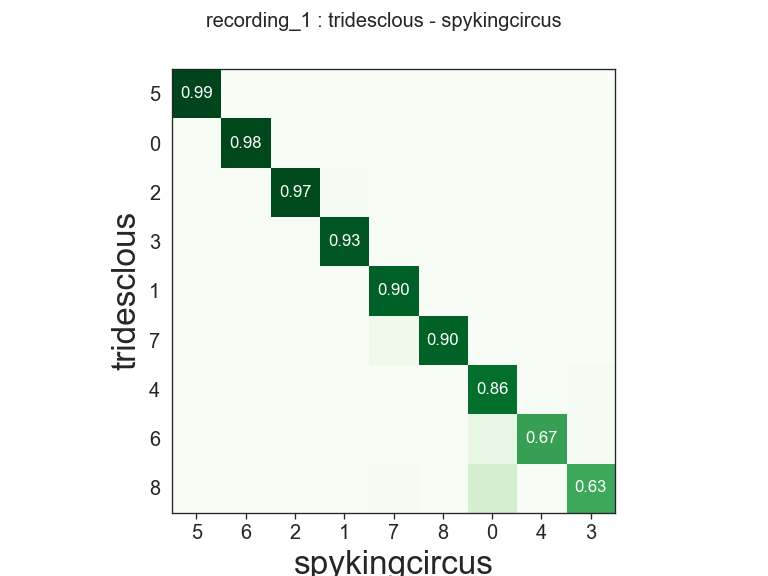

      0     1     2     3     4     5     6     7     8
0    13     2     2     6     1     7  1387     7     3
1     5     1     6     3     2     3     2  1248     2
2    10    37  1396     3     4     7     4     7     5
3     6  1303     7     0     2     2     1     1     2
4  2415     2     8    47     3     4     9     5     8
5     5     1     5     0     1  1411     4     1     0
6   436     3    13    53  1377     2    16     4     2
7    15     2     4     6     0     3     4   141  1388
8   797     0     0  1449     3     0    12    40     1
          0         1         2         3         4         5         6  \
0  0.003095  0.000716  0.000713  0.002074  0.000359  0.002483  0.976761   
1  0.001234  0.000379  0.002268  0.001095  0.000761  0.001125  0.000755   
2  0.002360  0.013262  0.965422  0.001024  0.001420  0.002454  0.001410   
3  0.001458  0.932046  0.002584  0.000000  0.000743  0.000732  0.000369   
4  0.856687  0.000525  0.002094  0.012138  0.000789  0.001041  0.

<IPython.core.display.Javascript object>


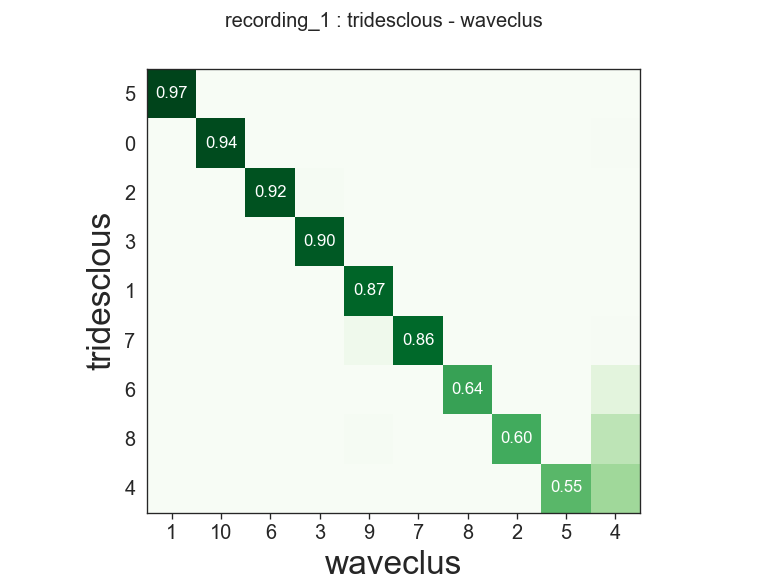

     1     2     3     4     5     6     7     8     9     10
0     0     0     0    15     0     1     0     0     2  1327
1     0     0     0     1     0     0     1     0  1201     0
2     0     0    33    10     3  1336     0     0     0     0
3     0     0  1260     1     2     2     0     0     0     0
4     0     0     1  1022  1335     2     0     2     2     1
5  1370     0     2     4     1     3     1     0     1     4
6     0     0     0   402    12     3     0  1320     2     1
7     1     2     2    12     7     2  1329     0   138     5
8     0  1357     0   783     3     0     0     1    39     4
         1         2         3         4         5         6         7   \
0  0.000000  0.000000  0.000000  0.005400  0.000000  0.000364  0.000000   
1  0.000000  0.000000  0.000000  0.000380  0.000000  0.000000  0.000387   
2  0.000000  0.000000  0.012004  0.003551  0.001076  0.923290  0.000000   
3  0.000000  0.000000  0.902579  0.000371  0.000751  0.000753  0.000000   
4  0.

<IPython.core.display.Javascript object>


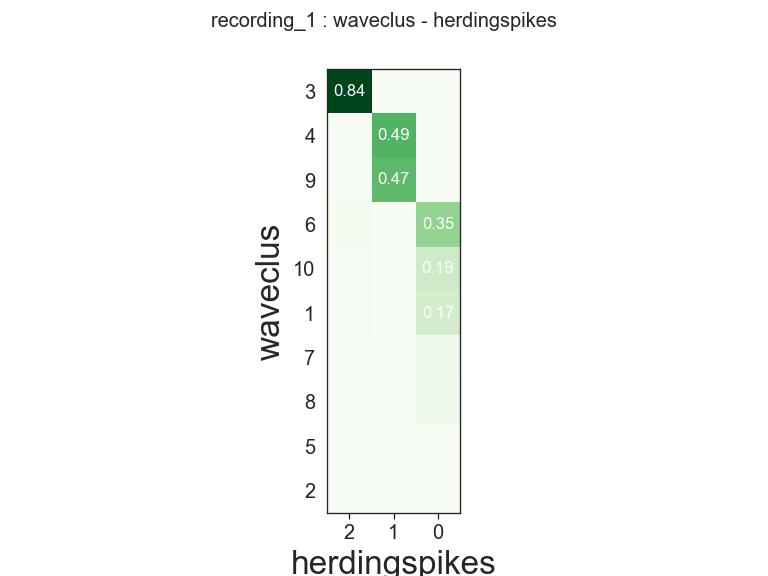

       0     1     2
1    622     0    11
2      1     0     0
3     23     2  1314
4      3  1357    23
5      6     0     1
6   1093     7    71
7    201     0     1
8    176     0     0
9      8  1301    27
10   671     4    23
           0         1         2
1   0.170598  0.000000  0.003809
2   0.000235  0.000000  0.000000
3   0.005454  0.000490  0.843931
4   0.000701  0.489185  0.007953
5   0.001414  0.000000  0.000347
6   0.347205  0.001715  0.025348
7   0.049851  0.000000  0.000349
8   0.043532  0.000000  0.000000
9   0.001893  0.467817  0.009510
10  0.188748  0.000983  0.008116


<IPython.core.display.Javascript object>


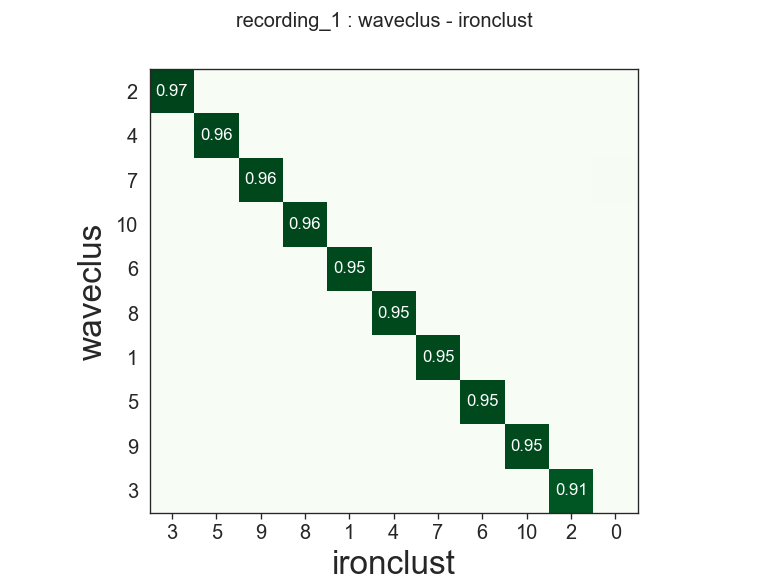

    0     1     2     3     4     5     6     7     8     9     10
1   13     0     0     0     0     0     0  1371     0     0     0
2    4     0     0  1357     0     0     0     0     0     2     0
3    8     1  1341     0     0     0     1     0     0     0     0
4    7     8     2     0     0  1371     3     0     3     0     2
5    8     3     1     2     2     1  1341     2     2     2     0
6   15  1335     3     0     0     0     2     1     0     0     0
7   57     0     0     0     0     0     2     1     0  1329     1
8    7     0     0     1  1318     0     4     0     0     0     0
9    9     0     1     0     0     0     1     1     0     1  1336
10   2     0     0     0     0     0     1     4  1326     0     0
          0         1         2         3         4         5         6   \
1   0.001079  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000332  0.000000  0.000000  0.968594  0.000000  0.000000  0.000000   
3   0.000665  0.000366  0.914734  0

<IPython.core.display.Javascript object>


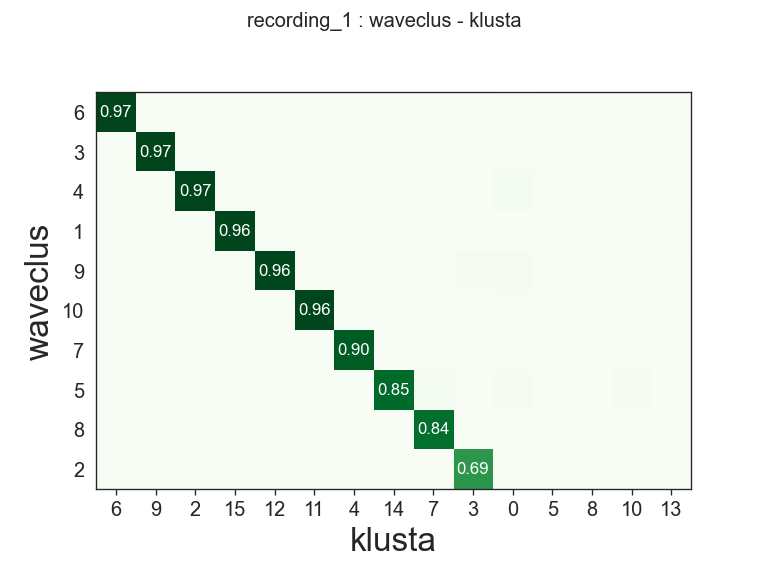

    0     2    3     4   5     6     7   8     9   10    11    12  13    14  \
1    1     0    0     0   1     0     0   0     0   0     0     0   8     0   
2    0     0  980     1   0     0     1   0     0   3     0     0   0     0   
3   10     0    0     0   6     0     0   0  1337   5     0     0   0     0   
4   25  1361    0     0   0     0     0   0     0   0     1     1   0     1   
5   12     0    5     2   1     0    42   0     0  15     0     0   0  1177   
6   11     0    0     0   0  1331     0   0     1   0     0     0   0     0   
7    0     0    0  1233   0     0     0   2     0   6     0     1   1     0   
8    0     0   13     0   0     0  1177   0     0   0     0     0   0     2   
9   19     0   26     3   1     0     3   2     0   0     0  1318   0     0   
10   9     0    3     0   0     0     1   0     0   0  1315     0   0     0   

      15  
1   1354  
2      0  
3      0  
4      0  
5      0  
6      2  
7      1  
8      0  
9      0  
10     1  
         

<IPython.core.display.Javascript object>


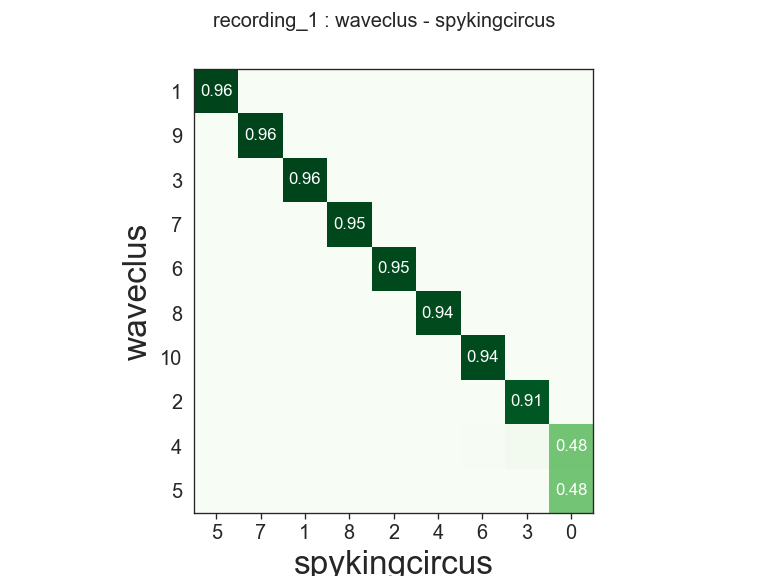

       0     1     2     3     4     5     6     7     8
1      0     0     0     0     0  1369     0     0     0
2      0     0     0  1356     0     0     0     0     2
3      1  1338     1     0     0     2     0     0     3
4   1368     1    10    85     1     4    16     2     5
5   1347     1     1     3     2     1     0     0     6
6      1     2  1336     0     0     3     1     0     1
7      0     0     0     0     0     1     0     1  1328
8     10     0     0     1  1312     0     0     0     0
9      2     0     0     3     2     1     0  1335     2
10     1     0     0     3     1     4  1322     0     1
           0         1         2         3         4         5         6  \
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.962729  0.000000   
2   0.000000  0.000000  0.000000  0.905207  0.000000  0.000000  0.000000   
3   0.000241  0.960517  0.000364  0.000000  0.000000  0.000724  0.000000   
4   0.483905  0.000360  0.003597  0.030411  0.000361  0.001427  0.005

<IPython.core.display.Javascript object>


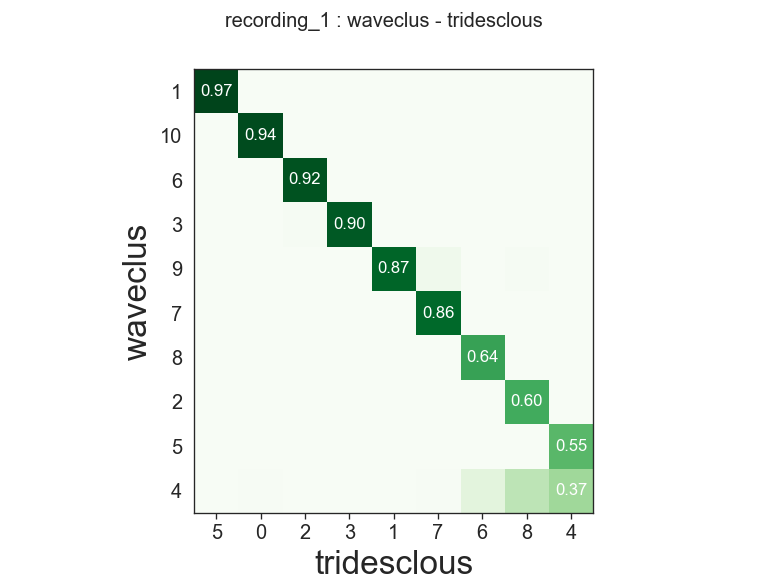

       0     1     2     3     4     5     6     7     8
1      0     0     0     0     0  1370     0     1     0
2      0     0     0     0     0     0     0     2  1357
3      0     0    33  1260     1     2     0     2     0
4     15     1    10     1  1022     4   402    12   783
5      0     0     3     2  1335     1    12     7     3
6      1     0  1336     2     2     3     3     2     0
7      0     1     0     0     0     1     0  1329     0
8      0     0     0     0     2     0  1320     0     1
9      2  1201     0     0     2     1     2   138    39
10  1327     0     0     0     1     4     1     5     4
           0         1         2         3         4         5         6  \
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.966831  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.012004  0.902579  0.000265  0.000725  0.000000   
4   0.005400  0.000380  0.003551  0.000371  0.366177  0.001429  0.131

In [55]:
compareSorters(sorter_list[1])

<IPython.core.display.Javascript object>


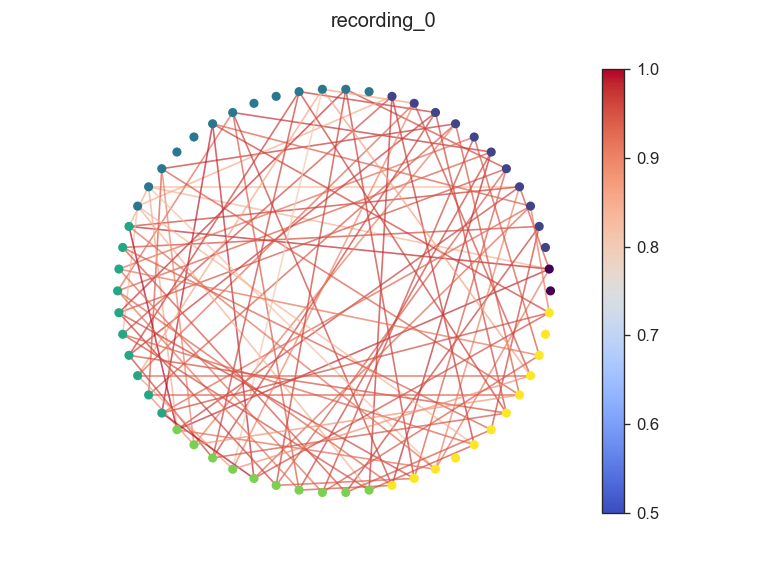

<IPython.core.display.Javascript object>


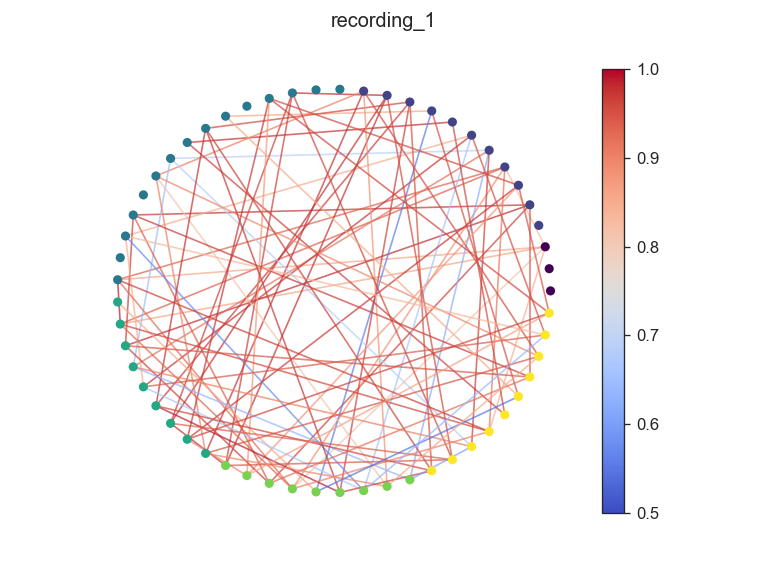

In [56]:
compareMultipleSorters(sorter_list)

In [ ]:
#Define Autoencoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

autoencoder = Sequential(
    [
        Input(shape=(fs,)),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(8,activation='relu'),
        Dense(16,activation='relu'),
        Dense(32,activation='relu'),
        Dense(fs,activation='sigmoid')
    ]
)

autoencoder.summary()

In [ ]:
# Filter Data

recording = st.preprocessing.bandpass_filter(recording, cache_to_file=True)

In [ ]:
# Get Data of Recording

recording_data = recording.get_traces(channel_ids=channel_ids,start_frame=0,end_frame=fs)

print(recording_data)

print("Number of Arrays :", len(recording_data))
print("Length of one Array :", len(recording_data[0,:]))

In [ ]:
# Train Autoencoder

autoencoder.compile(optimizer='adam',
                    loss = 'mae',
              metrics=['accuracy'])


autoencoder.fit(recording_data,recording_data, epochs=5)

